In [936]:
# import de librairies nécessaires
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering
import scipy
import pylab 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import inconsistent
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
import scipy.stats as st  
from scipy.stats import ks_2samp
from sklearn import decomposition, preprocessing
from IPython.core.display import HTML 
import warnings 
warnings.filterwarnings('ignore')
HTML("""<style> .output_png {display: table-cell; text-align: center; vertical-align: middle} </style>""")


#Import de fonctions utiles
from functions import *

# Problématique, données et résultats du projet:

Le but de ce projet est d'identifier les pays propices à une insertion dans le marché du poulet. Pourcelà, on fera une étude de marché dans tous les pays du monde afin de trouver les pays qu'on doit cibler pour notre business. Nous avons utilisé les données sur le site de la FAO, agence de l’ONU chargée de l’alimentation et de l’agriculture. Nous avons récupéré 4 fichiers csv qui sont:

-Les disponibilités alimentaires (2017) : http://www.fao.org/faostat/fr/#data/FBS -Pour les données de populations (2007 et 2017) : http://www.fao.org/faostat/fr/#data/OA -Pour les données de PIB (2017) : http://www.fao.org/faostat/fr/#data/MK

On a retenu comme variables sur notre base de données:

-la disponibilité alimentaire globale, en kcal/hab/jour

-la disponibilité totale en protéines et la disponibilité en protéines uniquement d’origine animales, en g/hab/j

-L'évolution de la population entre 2007 et 2017.

Nous avons également cherché des données spécifiques à la viande de volailles. Nous avons retenu :

-la production

-les importations

Nous avons choisi comme pays cibles, les pays qui ont:

-une forte disponibilité alimentaire, que ce soit en terme de calories ou de protéines, ce qui nous indiquerait un bon niveau de consommation.

-un pourcentage important de protéines animales dans la disponibilité totale en protéines, ce qui nous indiquerait une forte consommation de protéine animale.

-une évolution de la population importante qui nous indiquerait un nombre important de clientèle.

-un bon niveau de PIB par habitant, ce qui reflètera le bon niveau de pouvoir d'achat des clients.

-un bon rapport entre l'importation de viande de volaille et la production locale, qui nous indique le "niveau d'ouverture" à l'importation de nos produits.

# Jeu de données et corrélation


# Jeu de données


Data 1 - disponibilités alimentaires

In [937]:
#pour les disponibilités alimentaires

df_1=pd.read_csv("1.csv")
df_1.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2014-),Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Total General,2017,2051.00
1,Bilans Alimentaires (2014-),Afghanistan,Disponibilité de protéines en quantité (g/pers...,Total General,2017,56.16
2,Bilans Alimentaires (2014-),Afrique du Sud,Disponibilité alimentaire (Kcal/personne/jour),Total General,2017,2936.00
3,Bilans Alimentaires (2014-),Afrique du Sud,Disponibilité de protéines en quantité (g/pers...,Total General,2017,83.64
4,Bilans Alimentaires (2014-),Albanie,Disponibilité alimentaire (Kcal/personne/jour),Total General,2017,3390.00


In [938]:
# Création de la table pivot
df_1=df_1.pivot_table(index=['Zone'],values='Valeur',columns=['Élément','Produit'])
df_1.reset_index()


Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Produit,,Total General,Total General
0,Afghanistan,2051.0,56.16
1,Afrique du Sud,2936.0,83.64
2,Albanie,3390.0,118.17
3,Algérie,3341.0,92.82
4,Allemagne,3542.0,104.05
...,...,...,...
168,Émirats arabes unis,3344.0,112.95
169,Équateur,2599.0,66.46
170,États-Unis d'Amérique,3778.0,113.25


In [939]:
# fusionner les différentes dataframe 
a=df_1['Disponibilité alimentaire (Kcal/personne/jour)']
a=a.reset_index()
b=df_1['Disponibilité de protéines en quantité (g/personne/jour)']
b=b.reset_index()



df1 = pd.merge(a, b, on='Zone', how='inner')
df1=df1.rename(columns={'Total General_x': 'Dispo_alim_kcal',
                    'Total General_y': 'Dispo_alim_g'                  
                   })

In [940]:
df1.head()

Produit,Zone,Dispo_alim_kcal,Dispo_alim_g
0,Afghanistan,2051.0,56.16
1,Afrique du Sud,2936.0,83.64
2,Albanie,3390.0,118.17
3,Algérie,3341.0,92.82
4,Allemagne,3542.0,104.05


#### Data 2 -  les disponibilités alimentaires

In [941]:
#pour les disponibilités alimentaires

df_2=pd.read_csv("2.csv")
df_2.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2014-),Afghanistan,Disponibilité de protéines en quantité (g/pers...,Total General,2017,56.16
1,Bilans Alimentaires (2014-),Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2017,11.14
2,Bilans Alimentaires (2014-),Afrique du Sud,Disponibilité de protéines en quantité (g/pers...,Total General,2017,83.64
3,Bilans Alimentaires (2014-),Afrique du Sud,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2017,35.29
4,Bilans Alimentaires (2014-),Albanie,Disponibilité de protéines en quantité (g/pers...,Total General,2017,118.17


In [942]:
# pivot
df_2=df_2.pivot_table(index=['Zone'],values='Valeur',columns=['Élément','Produit'])
df_2.reset_index()

Élément                   Zone  \
Produit                          
0                  Afghanistan   
1               Afrique du Sud   
2                      Albanie   
3                      Algérie   
4                    Allemagne   
..                         ...   
168        Émirats arabes unis   
169                   Équateur   
170      États-Unis d'Amérique   
171                   Éthiopie   
172               Îles Salomon   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    11.14               56.16  
1                                                    35.29               83.64  
2                                                    64.08              118.17  
3                                                    26.71               92.82  
4                                                    62.77              104.05  
..                                                     ...                 ...  
168                                                  51.54              112.95  
169                                                  30.84               66.46  
170                                                  73.30              113.25  
171                                                   6.62               66.26  
172                                                  15.72               53.46  

[173 rows x 3 columns]

In [943]:
#proportion de protéines d'origine animale par rapport à la
#quantité totale de protéines dans la disponibilité alimentaire du pays

proteines_animaux=df_2['Disponibilité de protéines en quantité (g/personne/jour)']['Produits Animaux']
proteines_total=df_2['Disponibilité de protéines en quantité (g/personne/jour)']['Total General']
df_2['proteine_animal']=(proteines_animaux/proteines_total)*100
df_2.reset_index()

Élément                   Zone  \
Produit                          
0                  Afghanistan   
1               Afrique du Sud   
2                      Albanie   
3                      Algérie   
4                    Allemagne   
..                         ...   
168        Émirats arabes unis   
169                   Équateur   
170      États-Unis d'Amérique   
171                   Éthiopie   
172               Îles Salomon   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    11.14         
1                                                    35.29         
2                                                    64.08         
3                                                    26.71         
4                                                    62.77         
..                                                     ...         
168                                                  51.54         
169                                                  30.84         
170                                                  73.30         
171                                                   6.62         
172                                                  15.72         

Élément               proteine_animal  
Produit Total General                  
0               56.16       19.836182  
1               83.64       42.192731  
2              118.17       54.226961  
3               92.82       28.776126  
4              104.05       60.326766  
..                ...             ...  
168            112.95       45.630810  
169             66.46       46.403852  
170            113.25       64.724062  
171             66.26        9.990945  
172             53.46       29.405163  

[173 rows x 4 columns]

In [944]:
df_2.head()

Élément        Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                                Produits Animaux   
Zone                                                                      
Afghanistan                                                 11.14         
Afrique du Sud                                              35.29         
Albanie                                                     64.08         
Algérie                                                     26.71         
Allemagne                                                   62.77         

Élément                      proteine_animal  
Produit        Total General                  
Zone                                          
Afghanistan            56.16       19.836182  
Afrique du Sud         83.64       42.192731  
Albanie               118.17       54.226961  
Algérie                92.82       28.776126  
Allemagne             104.05       60.326766

In [945]:
# fusionner les différentes dataframe 
df2=df_2['proteine_animal']
df2=df2.reset_index()

In [946]:
# ordonner les valeurs

df2.sort_values(by="proteine_animal", ascending=False)

,Zone,proteine_animal
32,Chine - RAS de Hong-Kong,73.291149
72,Islande,72.727901
10,Australie,66.929283
43,Danemark,66.032515
100,Mongolie,66.032384
...,...,...
23,Burkina Faso,14.379506
126,Rwanda,13.962833
107,Nigéria,12.720727
92,Malawi,12.624154


On remarque d'abord que la proportion des proteines d'origine animal est égal à 73 % en Chine _ RAS de Hong-Kong, puis Island avec 72%, Australie avec 66%...

Data 3 - viande des volailles

In [947]:
# Création de la table avec des données viande des volailles

df_3=pd.read_csv("3.csv")
df_3.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2014-),Afghanistan,Production,Viande de Volailles,2017,28
1,Bilans Alimentaires (2014-),Afghanistan,Importations - Quantité,Viande de Volailles,2017,29
2,Bilans Alimentaires (2014-),Afrique du Sud,Production,Viande de Volailles,2017,1665
3,Bilans Alimentaires (2014-),Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,514
4,Bilans Alimentaires (2014-),Albanie,Production,Viande de Volailles,2017,13


In [948]:
# Pivot table

df_3=df_3.pivot_table(index=['Zone'],values='Valeur',columns=['Élément','Produit'])
df_3.reset_index()

Élément,Zone,Importations - Quantité,Production
Produit,,Viande de Volailles,Viande de Volailles
0,Afghanistan,29.0,28.0
1,Afrique du Sud,514.0,1665.0
2,Albanie,20.0,13.0
3,Algérie,2.0,297.0
4,Allemagne,842.0,1514.0
...,...,...,...
169,Émirats arabes unis,465.0,47.0
170,Équateur,0.0,340.0
171,États-Unis d'Amérique,123.0,21914.0


In [949]:
# proportion importation et production de viande des volailles

imp_volailles=df_3['Importations - Quantité']['Viande de Volailles']
pro_volailles=df_3['Production']['Viande de Volailles']
df_3['imp_sur_prod']=(imp_volailles/(imp_volailles+pro_volailles))*100

In [950]:
# affichage de dataframe
df_3.head()

Élément,Importations - Quantité,Production,imp_sur_prod
Produit,Viande de Volailles,Viande de Volailles,
Zone,,,
Afghanistan,29.0,28.0,50.877193
Afrique du Sud,514.0,1665.0,23.588802
Albanie,20.0,13.0,60.606061
Algérie,2.0,297.0,0.668896
Allemagne,842.0,1514.0,35.738540


In [951]:
# fusionner les différentes dataframe 
df3=df_3['imp_sur_prod']
df3=df3.reset_index()

In [952]:
df3.sort_values(by= "imp_sur_prod", ascending=False)

,Zone,imp_sur_prod
173,Îles Salomon,100.0
138,Samoa,100.0
45,Dominique,100.0
88,Luxembourg,100.0
135,Saint-Kitts-et-Nevis,100.0
...,...,...
14,Bangladesh,0.0
113,Ouganda,0.0
44,Djibouti,NaN
93,Maldives,NaN


Data 4 - PIB

In [953]:
df_4=pd.read_csv("4.csv")
df_4.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Indicateurs macro,Afghanistan,Valeur US $ par habitant,Produit Intérieur Brut,2017,513.085978
1,Indicateurs macro,Afrique du Sud,Valeur US $ par habitant,Produit Intérieur Brut,2017,6121.876572
2,Indicateurs macro,Albanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,4514.204908
3,Indicateurs macro,Algérie,Valeur US $ par habitant,Produit Intérieur Brut,2017,4109.701336
4,Indicateurs macro,Allemagne,Valeur US $ par habitant,Produit Intérieur Brut,2017,44552.061000


In [954]:
df4=df_4[['Zone','Valeur']]
df4=df4.rename(columns={'Valeur': 'pib_hbt_$'               
                   })

In [955]:
df4.head()

,Zone,pib_hbt_$
0,Afghanistan,513.085978
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.701336
4,Allemagne,44552.061000


Data 5 - population de 2007 et 2017

In [956]:
# import csv file population 2007 et 2017
df_5=pd.read_csv("5.csv")
df_5.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2007,27100.536
1,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2017,36296.113
2,Séries temporelles annuelles,Afrique du Sud,Population totale,Population-Estimations,2007,49119.759
3,Séries temporelles annuelles,Afrique du Sud,Population totale,Population-Estimations,2017,57009.756
4,Séries temporelles annuelles,Albanie,Population totale,Population-Estimations,2007,3033.998


In [957]:
# supprimer les doublons liées à la 'Chine'

df_5 = df_5[df_5.Zone.str.contains('Chine,') ==False]
df_5 = df_5[df_5.Zone.str.contains('Chine -') ==False]

In [958]:
# création pivot
df_5=df_5.pivot_table(index=['Zone'],values='Valeur',columns=['Élément','Année'])
df_5.reset_index()

Élément                       Zone Population totale           
Année                                           2007       2017
0                      Afghanistan         27100.536  36296.113
1                   Afrique du Sud         49119.759  57009.756
2                          Albanie          3033.998   2884.169
3                          Algérie         34166.972  41389.189
4                        Allemagne         81277.830  82658.409
..                             ...               ...        ...
229                   Îles Salomon           492.132    636.039
230        Îles Turques-et-Caïques            30.385     37.115
231       Îles Vierges américaines           107.115    104.751
232      Îles Vierges britanniques            25.047     29.577
233          Îles Wallis-et-Futuna            14.132     11.900

[234 rows x 3 columns]

Après quelques recherches, nous avons trouvé que la Chine et le regroupement des 4 autres nations cite ci-dessus, en bref si nous gardons les 5 nations précédentes nous aurons la Chine qui comptera deux fois dans notre tableau.

Chine = ( Chine - RAS de Hong-Kong + Chine - RAS de Macao + Chine, Taiwan Province de + Chine, continentale)

Comme nous souhaitons avoir des données précise nous retirerons des doublons.

In [959]:
## évolution de population entre 2007 et 2017, exprimée en pourcentage ;

pop_2007=df_5['Population totale'][2007]
pop_2017=df_5['Population totale'][2017]
df_5['evolution_pop']=((pop_2017-pop_2007)/pop_2007)*100

In [960]:
# calculation somme des population pour chaque année

sums = df_5.select_dtypes(pd.np.number).sum().rename('total')
df_5=df_5.append(sums)
df_5

Élément                   Population totale              evolution_pop
Année                                  2007         2017              
Zone                                                                  
Afghanistan                       27100.536    36296.113     33.931347
Afrique du Sud                    49119.759    57009.756     16.062776
Albanie                            3033.998     2884.169     -4.938335
Algérie                           34166.972    41389.189     21.138007
Allemagne                         81277.830    82658.409      1.698592
...                                     ...          ...           ...
Îles Turques-et-Caïques              30.385       37.115     22.149087
Îles Vierges américaines            107.115      104.751     -2.206974
Îles Vierges britanniques            25.047       29.577     18.085998
Îles Wallis-et-Futuna                14.132       11.900    -15.793943
total                           6705946.610  7548134.111   3310.117968

[235 rows x 3 columns]

In [961]:
# calcilation taux d'evolution pour les années 2007 - 2017 

df_5.iloc[-1,-1]=(((df_5.iloc[-1,1]-df_5.iloc[-1,0])/df_5.iloc[-1,0])*100).round(2)
df_5

Élément                   Population totale              evolution_pop
Année                                  2007         2017              
Zone                                                                  
Afghanistan                       27100.536    36296.113     33.931347
Afrique du Sud                    49119.759    57009.756     16.062776
Albanie                            3033.998     2884.169     -4.938335
Algérie                           34166.972    41389.189     21.138007
Allemagne                         81277.830    82658.409      1.698592
...                                     ...          ...           ...
Îles Turques-et-Caïques              30.385       37.115     22.149087
Îles Vierges américaines            107.115      104.751     -2.206974
Îles Vierges britanniques            25.047       29.577     18.085998
Îles Wallis-et-Futuna                14.132       11.900    -15.793943
total                           6705946.610  7548134.111     12.560000

[235 rows x 3 columns]

On remarque d'abord qu'il y'a une augmentation de la population mondiale entre 2007 et 2017 d'un taux égal à 12.56 %.

In [962]:
# creation dataframe avec le colonne evolution_pop

df5=pd.DataFrame(df_5['evolution_pop'])

In [963]:
df5.reset_index()

,Zone,evolution_pop
0,Afghanistan,33.931347
1,Afrique du Sud,16.062776
2,Albanie,-4.938335
3,Algérie,21.138007
4,Allemagne,1.698592
...,...,...
230,Îles Turques-et-Caïques,22.149087
231,Îles Vierges américaines,-2.206974
232,Îles Vierges britanniques,18.085998
233,Îles Wallis-et-Futuna,-15.793943


Les valeurs positives de l'évolution de population indique une croissance démographique, tandis que les valeurs négatives de l'évolution de population indique une diminution de population.

On remarque aussi que pour certains pays il y'a eu une augmentation de population entre 2007 et 2017 (par exemple Afrique du Sud), alors que pour d'autre il y'a eu une diminution(Albanie).

#  Fusionner toute les dataframes

In [964]:
# vérifier les dimensions des dataframes
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(173, 3)
(173, 2)
(174, 2)
(211, 2)
(235, 1)


In [965]:
# fusionner toutes les bases de données 
merge_1 = pd.merge(df1, df2, on='Zone', how='inner')
merge_2 = pd.merge(merge_1, df3, on='Zone', how='inner')
merge_3 = pd.merge(merge_2, df4, on='Zone', how='inner')
merge_4 = pd.merge(merge_3, df5, on='Zone', how='inner')

In [966]:
# la base de donnée finale qu'on utilisera par la suite
data = merge_4

In [967]:
data

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0,Afghanistan,2051.0,56.16,19.836182,50.877193,513.085978,33.931347
1,Afrique du Sud,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776
2,Albanie,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335
3,Algérie,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007
4,Allemagne,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592
...,...,...,...,...,...,...,...
164,Émirats arabes unis,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384
165,Équateur,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415
166,États-Unis d'Amérique,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262
167,Éthiopie,2334.0,66.26,9.990945,1.388889,721.753494,31.888173


In [968]:
# vérifier les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Zone             169 non-null    object 
 1   Dispo_alim_kcal  169 non-null    float64
 2   Dispo_alim_g     169 non-null    float64
 3   proteine_animal  169 non-null    float64
 4   imp_sur_prod     166 non-null    float64
 5   pib_hbt_$        169 non-null    float64
 6   evolution_pop    168 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.6+ KB


In [969]:
## valeurs manquantes
# Substitution des valeurs manquantes sur chaque colonne par la médianne de cette colonne, afin d'avoir des 
#valeurs représentatives au cas où les données contiennent des valeurs abhérentes (outliers)


data['imp_sur_prod'] = data['imp_sur_prod'].fillna(data['imp_sur_prod'].median())
data['evolution_pop'] = data['evolution_pop'].fillna(data['evolution_pop'].median())

In [970]:
# import csv file pour la balance commerciale
bc = pd.read_csv("prix_viande_volaille.csv")

In [971]:
bc.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Cultures et produits animaux,Afghanistan,Importations - Valeur,Viande de Volailles,2017,1000 US$,30284
1,Cultures et produits animaux,Afrique du Sud,Importations - Valeur,Viande de Volailles,2017,1000 US$,482569
2,Cultures et produits animaux,Afrique du Sud,Exportations - Valeur,Viande de Volailles,2017,1000 US$,105388
3,Cultures et produits animaux,Albanie,Importations - Valeur,Viande de Volailles,2017,1000 US$,17063
4,Cultures et produits animaux,Algérie,Importations - Valeur,Viande de Volailles,2017,1000 US$,5193


In [972]:
# pivot de la dataframe
bc= bc.pivot_table(index=['Zone'],values='Valeur',columns='Élément')
bc = bc.rename_axis(None,axis=1)

In [973]:
# renomage des colonnes 
bc.rename(columns =  {'Exportations - Valeur' : 'Export_USD'} , inplace = True)
bc.rename(columns =  {'Importations - Valeur' : 'Import_USD'} , inplace = True)

In [974]:
# Conversion en $
colonnes = ['Export_USD','Import_USD']
for col in colonnes:
    bc[col]*=1000

In [975]:
# traitement des valeurs manquantes
bc['Export_USD']=bc['Export_USD'].fillna(bc['Export_USD'].median())

bc['Import_USD']=bc['Import_USD'].fillna(bc['Import_USD'].median())

Text(0.5, 1.0, 'La balance commerciale  ')

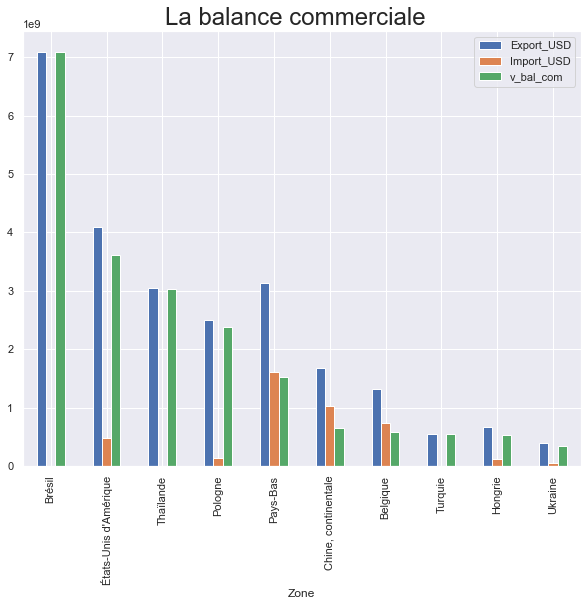

In [976]:
# calcul de la balance commerciale

sns.set(rc={"figure.figsize":(10, 8)})
bc['v_bal_com'] = bc['Export_USD'] - bc['Import_USD']
bc.sort_values(by='v_bal_com', ascending=False).head(10).plot(kind='bar')
plt.title("La balance commerciale  ", size=24)

Une balance commerciale positive signifie que le pays exporte plus de biens et services qu’il n’en importe : on parle alors d’« excédent commercial » ou de « balance excédentaire ». Quand elle est négative, on parle de « déficit commercial ». Nous voyons que le Brésil a la plus grande valeur de balance commerciale positive. Aussi, les États-Unies n'importent pas beaucoup par rapport à ce qu'ils exportent.

Text(0.5, 1.0, 'BALANCE COMMERCIAL')

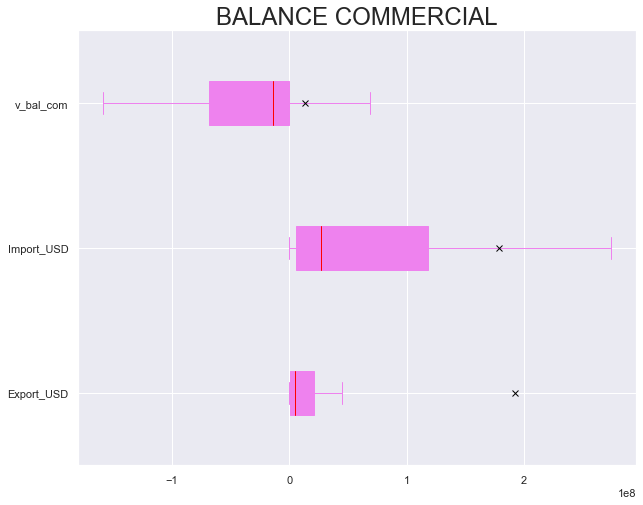

In [977]:
# creation boxplot avec Importation, Exportation et valeur de balance commercial du monde ( general)

medianprops = {'color': "red"}
meanprops = {'marker': 'x', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
filerprops = dict(linestyle = '_', linewidth = 3, color='black')
green_diamond = dict(markerfacecolor = 'g', marker = 'D')

bc.boxplot(showfliers=False, medianprops = medianprops,
                vert= False, patch_artist=True, showmeans=True, meanprops = meanprops, flierprops=green_diamond,color='violet').set_title("BALANCE COMMERCIAL", size=24)
              

Avec boxplot on obsere la distribution des données. Exportation en USD - min valeur est 0, max valeur est 40 000 000 USD. Mean value est 190 000 000 USD, parce que nous avons Brasil qui a l'exportation très très élévé.Median est 10 000 000 USD.

Importation en USD - min valeur est 0 , max est 280 000 000, mean est 180 000 000. Median est 30 000 000 USD.

Balance commerciale ( pour le viande des volailles ) - min valeur est - 180 000 000, , max est 70 000 000.Median est -10 000 000 USD. Nous voyons que la monde importe beaucoup plus qu'exporte.




La boîte à moustaches d'importation la viande des volailles indique que la fréquence d'importation médiane est de 26 567 000 USD. La fréquence d'importation du monde de la plupart des sujets est située entre 5 499 750 USD et 118 329 000 USD, mais la fréquence d'importation peut baisser jusqu'à 8 000 USD ou atteindre 3 677 849 000 USD. 50 % de monde importe la viande des volailles en 26 567 000 USD, 75 % de monde importe 118 329 000 USD.  Mean value est 179 095 400 USD.
50% du monde importe la viande des volailles pour le valeur de  26 559 000 USD, autre 50 % de monde importe la viande des volailles pour le valeur de 3 651 282 000 USD.

Nous pouvons constater que l' importation médiane la viande des volailles est superieure à celle d'exportation et la balance comerciale. 
Le coefficient de dissymétrie des données pour l'importation est plus élevé que celui l'exportation et la balance comerciale.
On peut constater que le monde fait plus l'importation que l'exportation.


La boîte à moustaches d'exportation la viande des volailles indique que la fréquence d'exportation médiane est de 4 379 000 USD. La fréquence d'exportation du monde de la plupart des sujets est située entre 215 250 USD et 20 895 250 USD, mais la fréquence d'exportation peut baisser jusqu'à 0 USD ou atteindre 7 092 181 000 USD. 50 % de monde exporte la viande des volailles en 4 379 000 USD, 75 % de monde importe 20 895 250 USD.  Mean value est 192 349 700 USD.
50% du monde exporte la viande des volailles pour le valeur de  26 559 000 USD, autre 50 % de monde exporte la viande des volailles pour le valeur de 7 087 802 000 USD.

La boîte à moustaches la balance comercial ( exportation-importation ) indique que la valeur de  balance comercial médiane est -13 802 500 USD. La valeur de balance comercial du monde de la plupart des sujets est située entre -68 704 250 USD et -369 000 USD, mais la valeur la balance comercial  peut baisser jusqu'à -3 659 320 000 USD ou atteindre 7 083 621 000 USD. La valeur de balance comercial montre la valeur de 50 % est -13 802 500  USD, 75 % de monde montre -369 000.0 USD.  Mean value est 13 254 320 USD.
50% le valeur de balance comercial est 7 069 818 500 USD, autre 50 % de -3 645 517 500.0 USD.

C’est lorsque la valeur des importations d’un pays dépasse la valeur de ses exportation. La valeur qui en résulte est appelé déficit commerciale.  Par exemple, un pays avec un déficit commercial emprunte de l’argent pour acheter des biens et des services, mais un pays avec un excédent commercial fait essentiellement le contraire.




In [978]:
# methode quantile / precision des nombres pour le boxplot
bc.quantile([.25,.50, .75,])

,Export_USD,Import_USD,v_bal_com
0.25,215250.0,5499750.0,-68704250.0
0.50,4379000.0,26567000.0,-13802500.0
0.75,20895250.0,118329000.0,-369000.0


In [979]:
bc.median()

Export_USD     4379000.0
Import_USD    26567000.0
v_bal_com    -13802500.0
dtype: float64

In [980]:
# tableau statistique
data.describe()

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,2863.408284,81.339349,42.225899,34.269922,13395.857924,15.541942
std,454.667833,20.328317,15.706370,33.875873,18559.236194,14.761386
min,1799.000000,41.320000,9.990945,0.000000,359.232443,-12.690044
25%,2544.000000,64.740000,28.015821,4.026846,1961.338029,4.805753
50%,2855.000000,82.080000,42.333881,23.308260,5714.068676,12.969691
75%,3269.000000,96.920000,56.373857,60.606061,15611.095187,25.023069
max,3835.000000,144.800000,72.727901,100.000000,108431.931751,75.598440


In [981]:
# on exclude colonne avec Pays

d = data.select_dtypes(exclude=['object'])

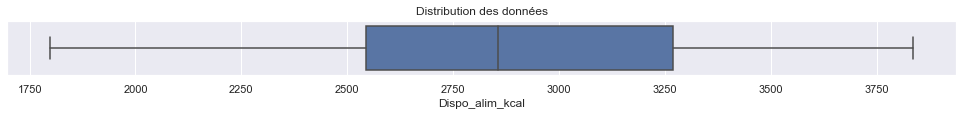

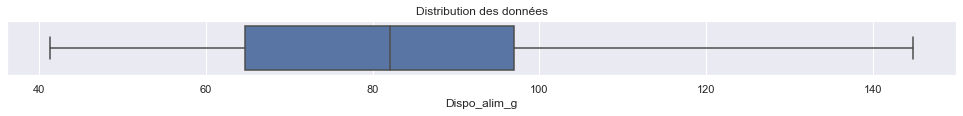

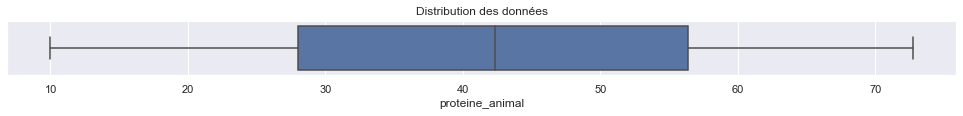

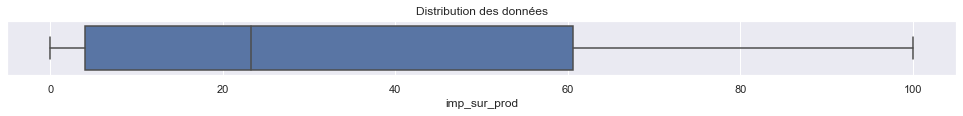

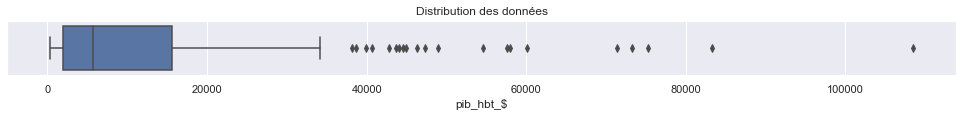

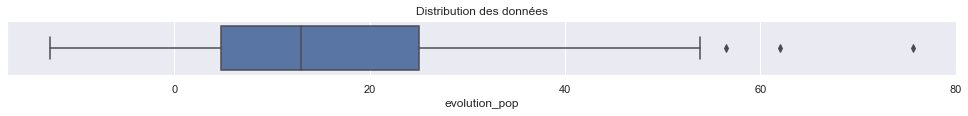

In [982]:
import matplotlib.pyplot as plt

for column in d:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)
        plt.title('Distribution des données')
        

In [983]:
# methode quantile / precision des nombres pour le boxplot

d.quantile([.25,.50, .75,])

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0.25,2544.0,64.74,28.015821,4.026846,1961.338029,4.805753
0.50,2855.0,82.08,42.333881,23.308260,5714.068676,12.969691
0.75,3269.0,96.92,56.373857,60.606061,15611.095187,25.023069


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

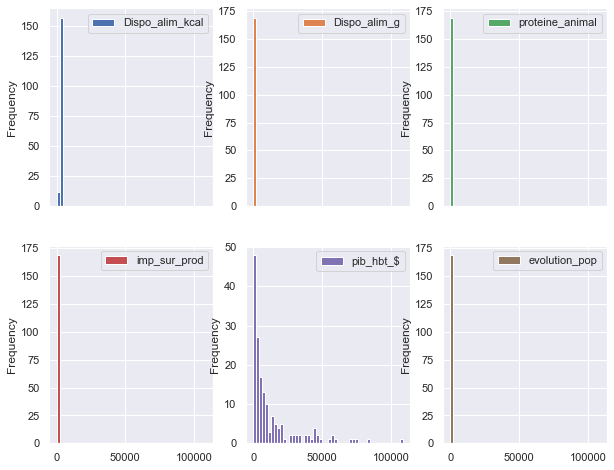

In [984]:
# graphs de frequence nos variables

data.plot.hist(subplots=True, legend=True, layout=(2, 3), bins=50)


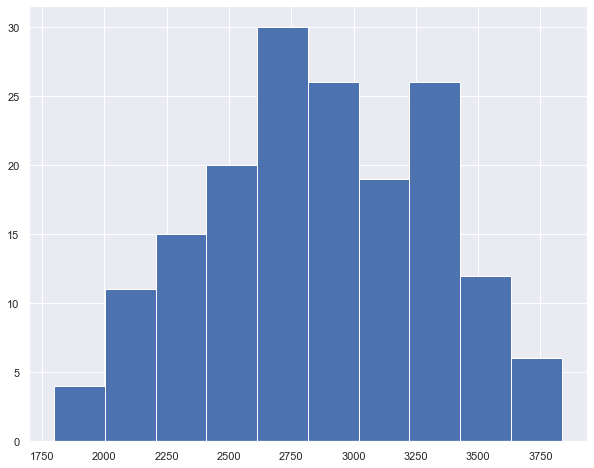

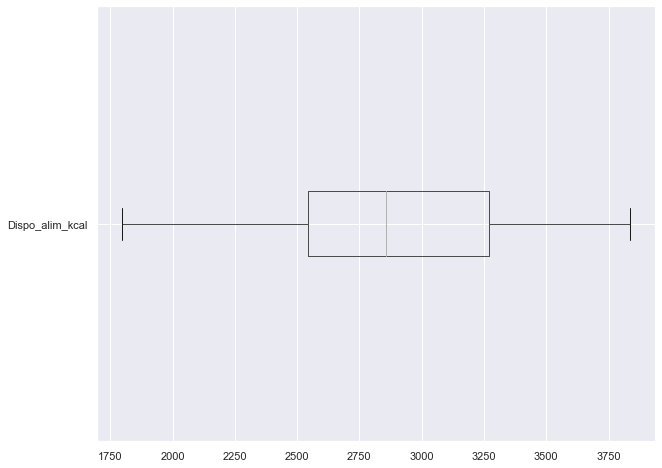

moy:
 2863.408284023669
med:
 2855.0
mod:
 0    2157.0
1    2712.0
2    2936.0
3    3162.0
4    3274.0
5    3344.0
6    3366.0
7    3388.0
dtype: float64
var:
 205499.62620356432
ect:
 453.320665978912


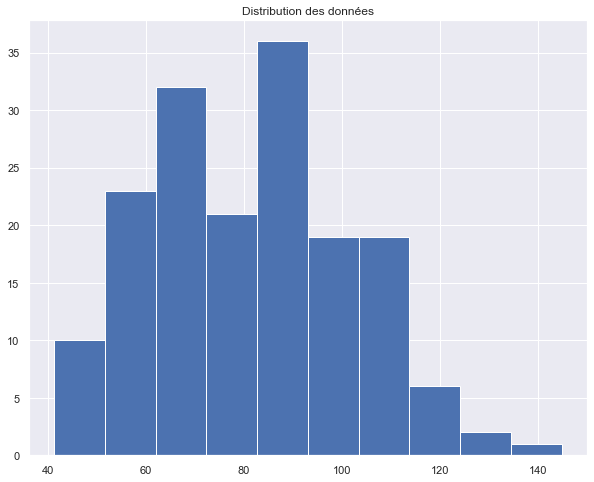

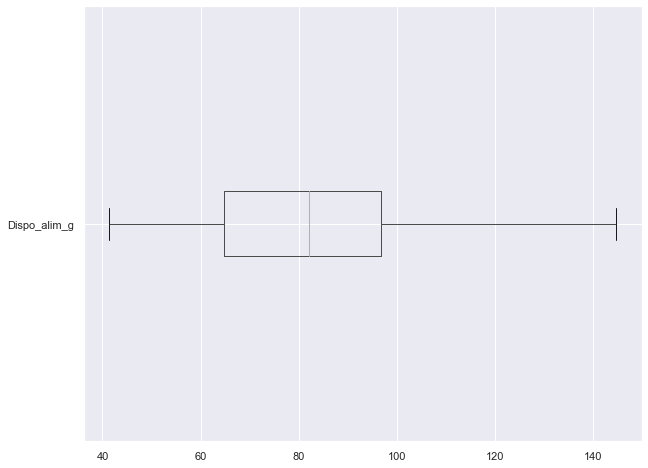

moy:
 81.33934911242602
med:
 82.08
mod:
 0    60.68
1    92.82
dtype: float64
var:
 410.7952510556353
ect:
 20.26808454333155


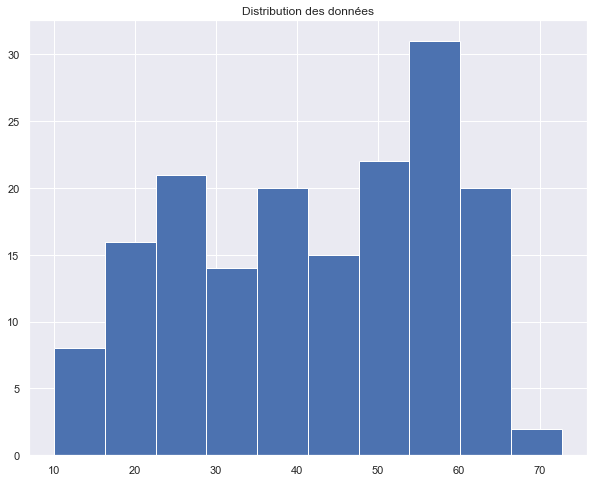

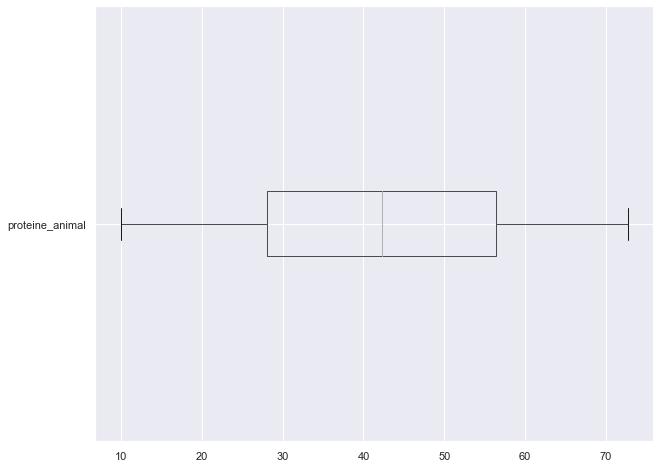

moy:
 42.22589933645092
med:
 42.33388119276825
mod:
 0       9.990945
1      12.624154
2      12.720727
3      13.962833
4      14.379506
         ...    
164    65.021737
165    66.032384
166    66.032515
167    66.929283
168    72.727901
Length: 169, dtype: float64
var:
 245.23036047404608
ect:
 15.659832709005741


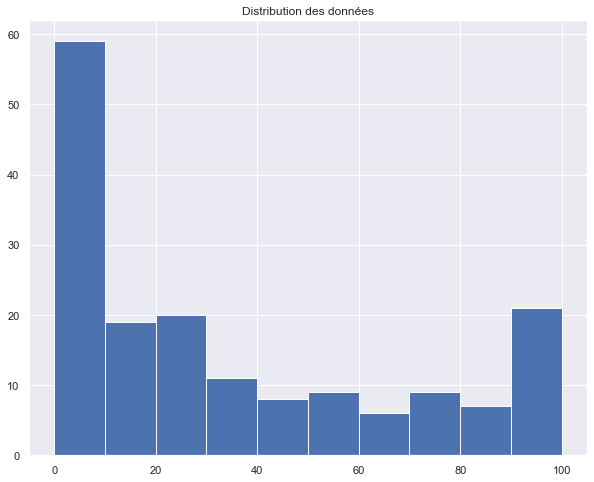

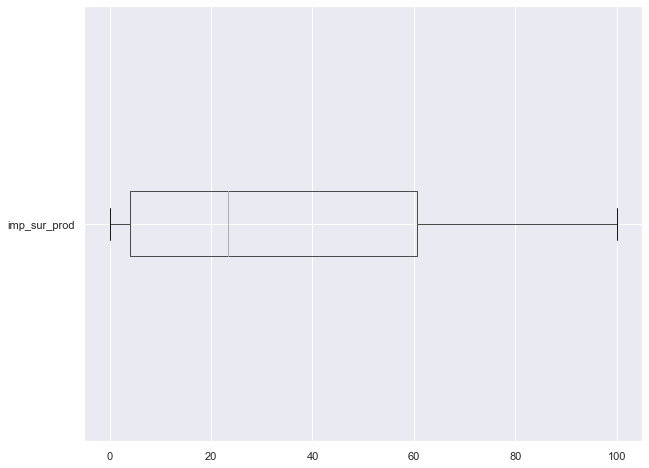

moy:
 34.269922006332564
med:
 23.308260376475975
mod:
 0    0.0
dtype: float64
var:
 1140.7844139205504
ect:
 33.77550020237377


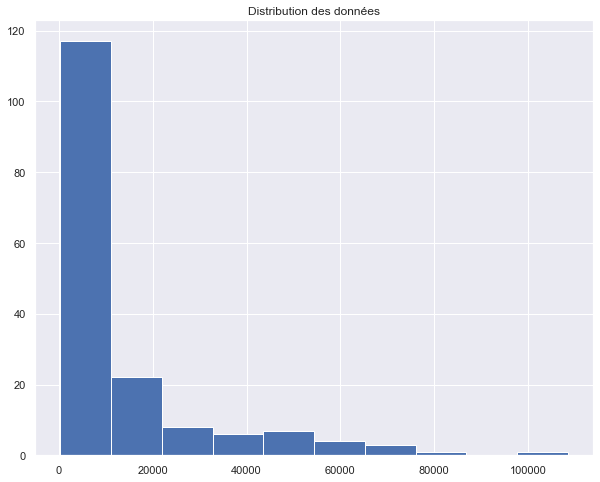

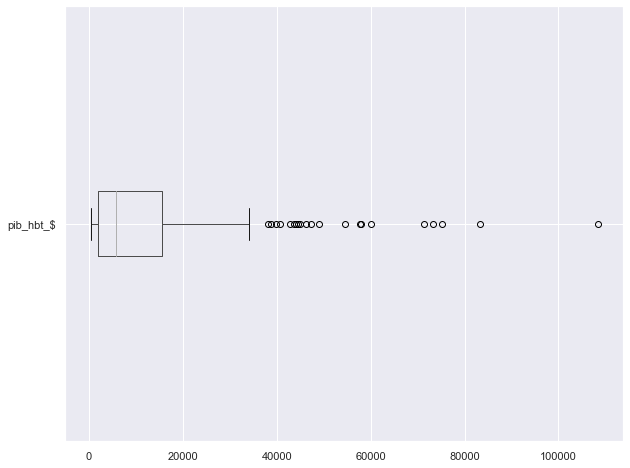

moy:
 13395.85792387574
med:
 5714.068676
mod:
 0         359.232443
1         450.900697
2         461.414754
3         499.381240
4         513.085978
           ...      
164     71391.006104
165     73231.725965
166     75220.814442
167     83313.013992
168    108431.931751
Length: 169, dtype: float64
var:
 342407110.5263619
ect:
 18504.24574324395


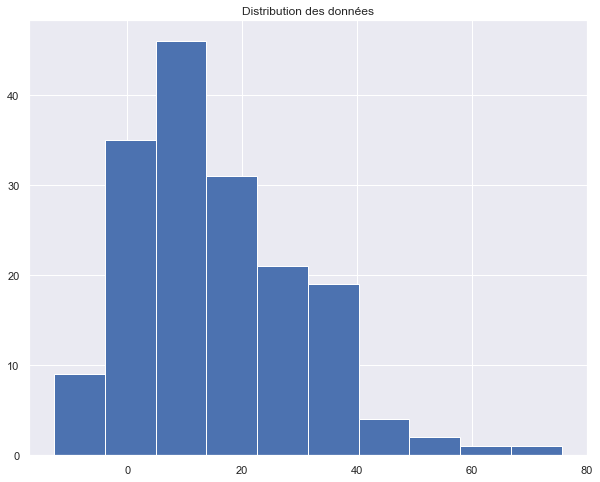

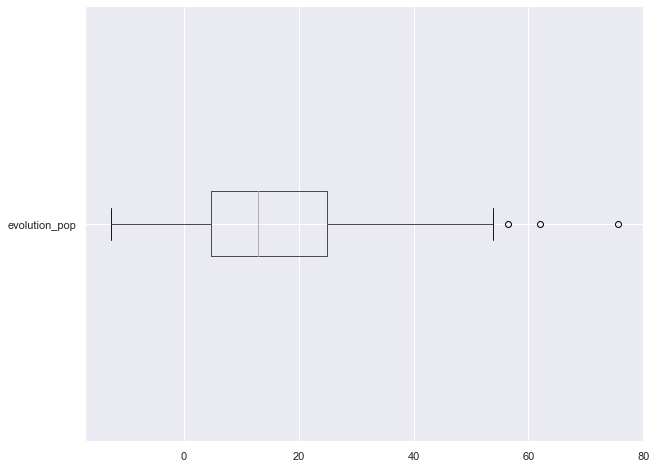

moy:
 15.541941547689273
med:
 12.969691392338976
mod:
 0     -12.690044
1     -11.236670
2     -10.929694
3      -6.561793
4      -6.259054
         ...    
164    48.104986
165    53.792384
166    56.441326
167    61.983555
168    75.598440
Length: 169, dtype: float64
var:
 216.60917022805035
ect:
 14.71764825738305


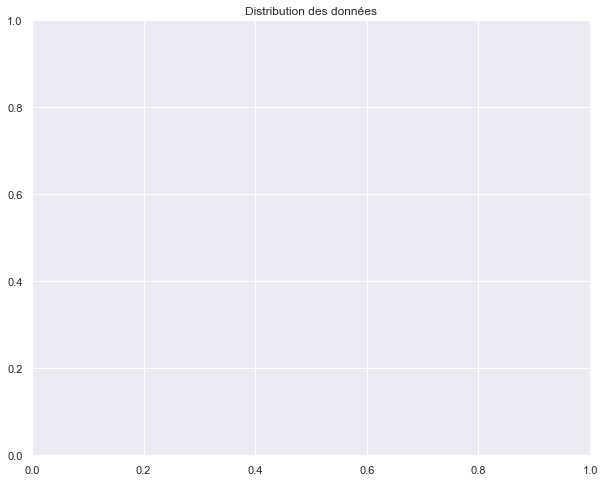

In [985]:
# Cretation histograme et bohplot pour le mieux visulation de statistique descriptive des nos variables

# manque title

def hist_boxplot(data, num_column):
    data.iloc[:,num_column].hist()
    plt.show()
    data.boxplot(data.columns[num_column], vert=False)
    plt.show()
    print("moy:\n",data.iloc[:,num_column].mean())
    print("med:\n",data.iloc[:,num_column].median())
    print("mod:\n",data.iloc[:,num_column].mode())
    print("var:\n",data.iloc[:,num_column].var(ddof=0))
    print("ect:\n",data.iloc[:,num_column].std(ddof=0))
    plt.title('Distribution des données')
for i in range(1,data.shape[1]):
    hist_boxplot(data, i)
    

# Analyse de corrélations

Text(0.5, 1.0, 'Pairplot')

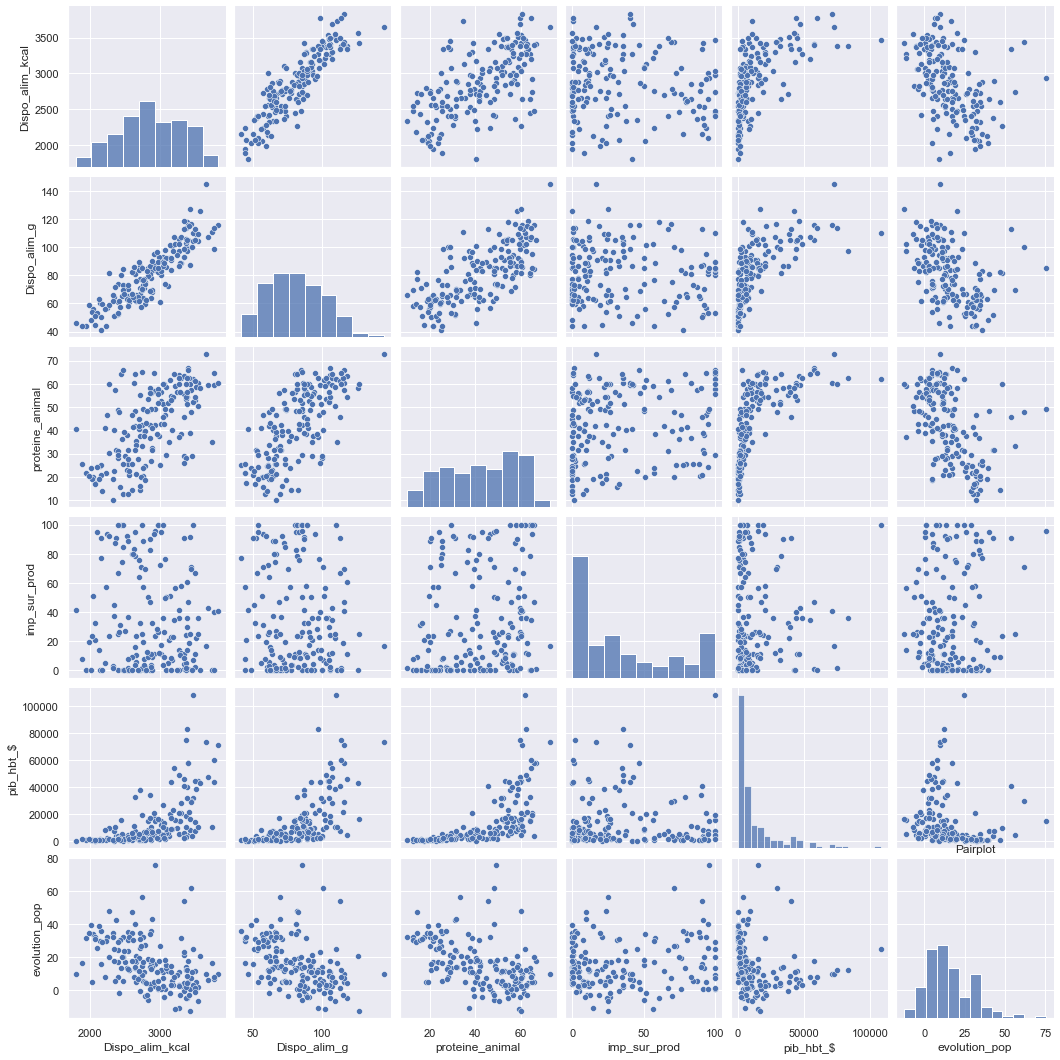

In [986]:
# creation de pairplot (la relation par paire entre les différentes variables d'un ensemble de données.)

sns.pairplot(data)
plt.title("Pairplot")

L'histogramme sur la diagonale nous permet de voir la distribution d'une seule variable tandis que les diagrammes de dispersion sur les triangles supérieur et inférieur montrent la relation (ou l'absence de relation) entre deux variables.

Avec pairplot nous pouvons voir relation entre variables. Par example dispo_alim_kcal et dispo_alim_g sont corralé negative avec l'evolution de population. Donc si une valeur augmante autre va diminuer.

Nous observons que il y a perfect correlation entre disp_alim-kcal et disp_alim_g.

# Matrice de corrélation

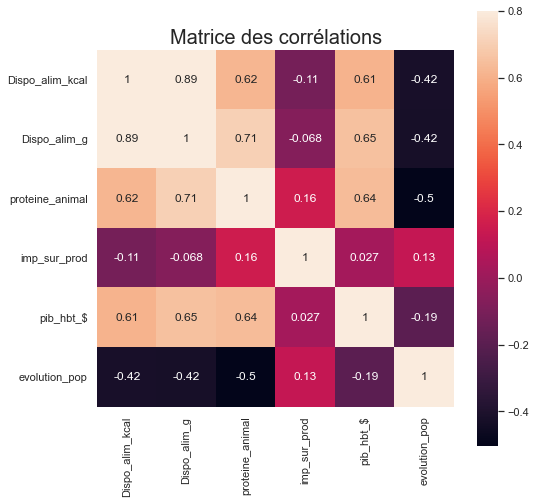

In [987]:
# creation heatmap , corr() - method - pearson

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(),annot=True, vmax=.8, square=True)
plt.title("Matrice des corrélations", fontsize=20) ; plt.show()

Observations:

D'après le tableau de contingence coloré ci-dessus, on peut estimer une corrélation positive très forte entre la disponibilité intérieure en protéines de chaque pays ( 0.65 ), celle en kcalories ( 0.61 ), la proportion de protéines animales ( 0.64 ) par rapport à la quantité totale de protéines et le PIB par habitant. Ceci signifie que quand la valeur d'une variable augmente, la valeur de l'autre variable augmente aussi.
On peut estimer une corrélation positive très forte  0.89 entre dispo_alim_kcal et dispo_alim_g.

On peut dire que les pays les plus consommateurs de viande sont donc les pays les plus riches.

On distingue une corrélation négative entre l'évolution de population et la variable proteine_animal ( -0.5 ). les pays qui ont une évolution démographique importante ont tendance à consommer moins de protéines d'origine animal.



Text(0.5, 1.0, 'Variable avant centrage et reduction')

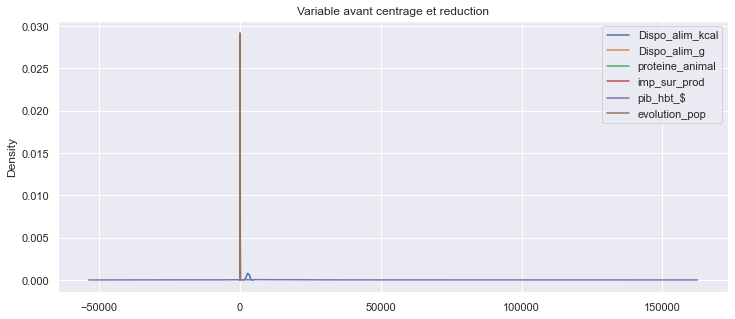

In [988]:
# verification avant centrage et reduction
data.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.title("Variable avant centrage et reduction")

L'ACP est sensible aux valeurs des variables. Il a tendance à donner plus de poids aux variables qui ont des valeurs plus importantes comparés aux variables qui ont des valeurs moins importantes. C'est pour cette raison qu'on standardise notre dataframe, afin qu'on donne la même importance à toutes les variables.

In [989]:
# preparation la colonne Zone
# je prends de colone Zone le premiere trois lettre et de colone deux lettre derniere


data['Zone'] = data['Zone'].str[0:3]

data

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592
...,...,...,...,...,...,...,...
164,Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384
165,Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415
166,Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262
167,Éth,2334.0,66.26,9.990945,1.388889,721.753494,31.888173



#  Création de groupes (clustering)

#  Standardisation de notre dataframe 

In [990]:
data

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592
...,...,...,...,...,...,...,...
164,Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384
165,Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415
166,Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262
167,Éth,2334.0,66.26,9.990945,1.388889,721.753494,31.888173


In [991]:
poulet = data.set_index("Zone")

poulet


,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Zone,,,,,,
Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347
Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776
Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335
Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007
All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592
...,...,...,...,...,...,...
Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384
Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415
Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262


In [992]:
# centrage et reduction
X = poulet.values
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

poulet = pd.DataFrame(X_scaled, index=poulet.index, columns=poulet.columns)

poulet.head()

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Zone,,,,,,
Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480
Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388
Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545
Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228
All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595


Text(0.5, 1.0, 'Variable aprés centrage et reduction')

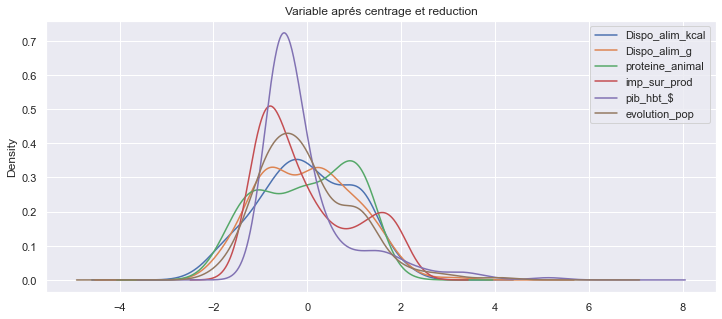

In [993]:
# verification aprés centrage et reduction
poulet.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.title("Variable aprés centrage et reduction")

In [994]:
# affichage notre dataframe

poulet.head()

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Zone,,,,,,
Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480
Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388
Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545
Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228
All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595



# ACP

L’enjeu d’une ACP est de trouver le meilleur plan de projection ayant la plus grande inertie, c’est à dire limitant le plus la perte d’information originelle. Les 6 variables seront synthétisées en de nouvelles variables : PC1, PC2, etc...

Le rôle de l’ACP est de :

Visualiser les relations entre variables à l’aide d’un cercle de corrélation : et la variabilité entre les pays (nous y reviendrons).

Comme précédemment, une ACP ne peut se faire que si les données sont centrées et réduites (transformation pour que moyenne = 0, écart-type = 1).

# Choix du nombre de PCA

In [995]:
# copy dataframe poulet 

data2=poulet.copy()  

data2.head(4)

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Zone,,,,,,
Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480
Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388
Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545
Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228


In [996]:
#Sélection des variables
data_pca = data2[["evolution_pop", "Dispo_alim_g", "proteine_animal", "Dispo_alim_kcal", 
                 "imp_sur_prod", "pib_hbt_$"]]

#Préparation des données pour le clustering
X = data_pca.values
pays = data_pca.index
n_comp = len(data_pca.columns)
n = data_pca.shape[0]
p = data_pca.shape[1]
features =data_pca.columns

#Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Instanciation de la reduction de dimension
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#Vérification des moyennes (aux erreurs de troncature près) et des écarts-type unitaires
print(np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0))

[-5.25549361e-18  2.10219744e-17  2.62774680e-17 -2.10219744e-17
  5.25549361e-18  5.25549361e-18] [1. 1. 1. 1. 1. 1.]


In [997]:
#Variance expliquée
print(pca.explained_variance_)

[3.35001165 1.10641845 0.81141712 0.42334114 0.24653233 0.0979936 ]


In [998]:
#Variance expliquée corrigée
eigval= (n-1)/n*pca.explained_variance_
eigval

array([3.33018909, 1.0998716 , 0.80661583, 0.42083616, 0.24507356,
       0.09741376])

In [999]:
#Variance expliquée corrigée 2
eigval2 = pca.singular_values_**2/n
eigval2

array([3.33018909, 1.0998716 , 0.80661583, 0.42083616, 0.24507356,
       0.09741376])

In [1000]:
#Proportion de variance expliquée
prop_var = pca.explained_variance_ratio_ * 100
np.around(prop_var, 1)

array([55.5, 18.3, 13.4,  7. ,  4.1,  1.6])

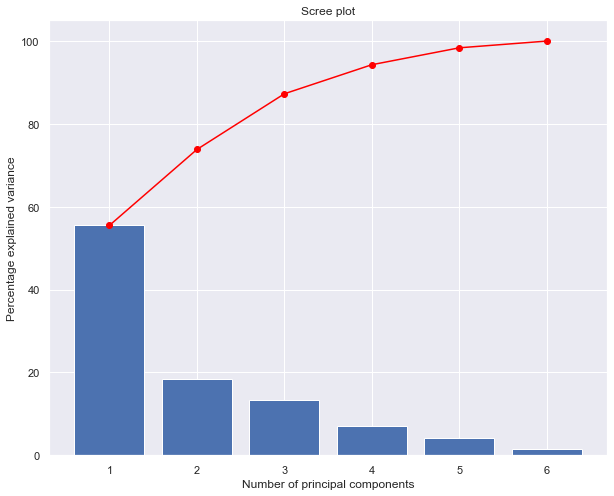

[55.5 18.3 13.4  7.   4.1  1.6]


In [1001]:
#Affichage des éboulis des valeurs propres
display_scree_plot(pca)
print(np.around(prop_var, 1))

In [1002]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [1003]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


   Val.Propre    Seuils
0    3.330189  2.450000
1    1.099872  1.450000
2    0.806616  0.950000
3    0.420836  0.616667
4    0.245074  0.366667
5    0.097414  0.166667


Le nombre de facteurs en utilisant par défaut le critère de Kaiser (valeurs propres supérieures à 1)

Deux facteurs sont retenus, tel qu’indiqué par la tableau.

In [1004]:
#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
covar = np.zeros((p,p))
for k in range(p):
    covar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

mat_cor = pd.DataFrame(np.around(covar, 2),
                       index=features,
                       columns=['COR_'+str(i + 1) for i in range(p)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
evolution_pop,-0.58,0.30,0.73,-0.08,0.19,-0.01
Dispo_alim_g,0.93,-0.04,0.14,-0.25,0.04,0.23
proteine_animal,0.86,0.23,-0.18,0.21,0.37,-0.05
Dispo_alim_kcal,0.89,-0.11,0.16,-0.35,-0.07,-0.20
imp_sur_prod,-0.04,0.95,-0.24,-0.16,-0.11,0.00
pib_hbt_$,0.78,0.19,0.38,0.40,-0.24,0.00


In [1005]:
#Qualité de représentation des variables - cos2
cos2var = covar**2
    
qual_repr_var = pd.DataFrame(np.around(cos2var, 2),
                             index=features,
                             columns=['COS_2_' + str(i + 1) for i in range(p)])
qual_repr_var

,COS_2_1,COS_2_2,COS_2_3,COS_2_4,COS_2_5,COS_2_6
evolution_pop,0.34,0.09,0.53,0.01,0.03,0.00
Dispo_alim_g,0.86,0.00,0.02,0.06,0.00,0.05
proteine_animal,0.73,0.05,0.03,0.05,0.14,0.00
Dispo_alim_kcal,0.80,0.01,0.02,0.12,0.01,0.04
imp_sur_prod,0.00,0.90,0.06,0.02,0.01,0.00
pib_hbt_$,0.60,0.04,0.14,0.16,0.06,0.00


In [1006]:
#Vérification
np.sum(qual_repr_var, axis=1)

evolution_pop      1.00
Dispo_alim_g       0.99
proteine_animal    1.00
Dispo_alim_kcal    1.00
imp_sur_prod       0.99
pib_hbt_$          1.00
dtype: float64

In [1007]:
#Contribution des variables aux axes
ctrvar = cos2var * 100
for j in range(p):
    ctrvar[:,j] = ctrvar[:,j]/eigval[j]

ctr_ax_var = pd.DataFrame(np.around(ctrvar,1),
                          index=features,
                          columns=['CTR_' + str(i + 1) for i in range(p)])

ctr_ax_var

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
evolution_pop,10.1,8.4,65.5,1.7,14.0,0.2
Dispo_alim_g,25.8,0.1,2.4,15.4,0.6,55.7
proteine_animal,22.0,4.8,3.8,10.9,55.5,3.0
Dispo_alim_kcal,23.9,1.1,3.1,28.7,2.1,41.1
imp_sur_prod,0.0,82.2,7.3,5.8,4.7,0.0
pib_hbt_$,18.1,3.4,17.9,37.5,23.1,0.0


Les variables qui contribuent le mieux à l’inertie des axes, 

                                                                                       
c’est-à-dire celles expliquent plus de  

       
= 100/  Nombre de variables % =  16.7 % de l’inertie totale.
                                            
Donc on peut dire tous les variables au_dessus de 16%.

In [1008]:
#Vérification
np.sum(ctr_ax_var, axis=0)

CTR_1     99.9
CTR_2    100.0
CTR_3    100.0
CTR_4    100.0
CTR_5    100.0
CTR_6    100.0
dtype: float64

In [1009]:
#moyenne

print(np.mean(X,axis=0))

[ 1.31387340e-16  2.10219744e-17 -3.57373565e-16 -3.15329616e-16
  7.88324041e-17  5.25549361e-18]


In [1010]:
#écart-type
print(np.std(X,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


In [1011]:
n_comp = 2

# Sélection des colonnes à prendre en compte dans l'ACP:
data_pca = data2[["evolution_pop", "Dispo_alim_g", "proteine_animal", "Dispo_alim_kcal", 
                 "imp_sur_prod", "pib_hbt_$"]]

# Préparation des données pour l'ACP, la table "data" étant déjà centrée-réduite, nous éviterons de le faire à nouveau:
data_pca = data_pca.fillna(data_pca.mean())

X , names = data_pca.values , data.index

n = data_pca.shape[0]
p = data_pca.shape[1]
features = data.columns ; X_scaled = X

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Présentons les deux nouvelles variables créées dans le tableau appelé "composantes":
composantes=pd.DataFrame(pca.fit_transform(X_scaled), index=data.index)
composantes.columns=["F1", "F2"] ; composantes.head(4)

,F1,F2
0,-2.881381,0.604015
1,-0.037636,-0.370109
2,2.073614,0.191488
3,0.084797,-1.204156


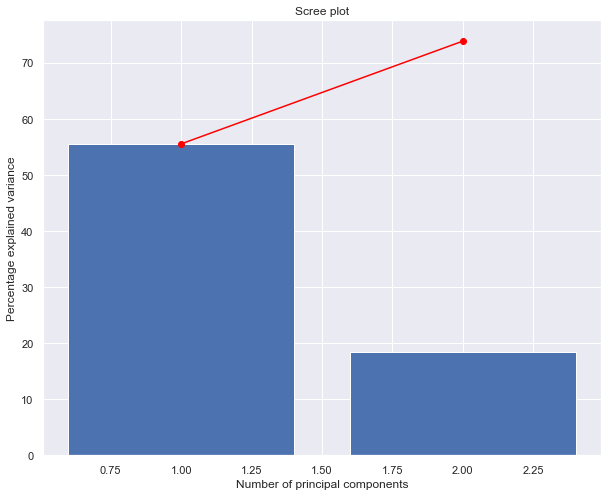

[55.5 18.3 13.4  7.   4.1  1.6]


In [1012]:
#Affichage des éboulis des valeurs propres
display_scree_plot(pca)
print(np.around(prop_var, 1))

Les variables PC1 et PC2 représentent respectivement 55% et 18% de l'inertie totale, pour un nombre de 2 variables. Une variable de base ne représentant 100/6=16% de l'inertie totale, nous pouvons considérer comme importantes la variable PC2, et surtout la variable PC1.

In [1013]:
#la variance expliquée par chacune des composantes principales. 
#Ces valeurs sont aussi les premières 2 grandes valeurs propres 
#de la matrice de covariance liée à notre dataframe
pca.explained_variance_ratio_

array([0.55503152, 0.18331193])

In [1014]:
#somme cumulative de la variance expliquée par les 2 PCs
pca.explained_variance_ratio_.cumsum()

array([0.55503152, 0.73834345])

Il s'agit d'un tableau de la variance des données expliquée par chacune des 2 composantes principales, en commençant par la PC1, la composante principale qui explique la plus grande partie de la variance.

Nous pouvons aussi exprimer le taux de variance expliquée sous forme de somme cumulative. Cela montre maintenant plus clairement la quantité de variance expliquée lorsque nous ajoutons des composantes principales. PC1 explique 55%, PC1 et PC2 expliquent 74%.


# Cercle des corrélations

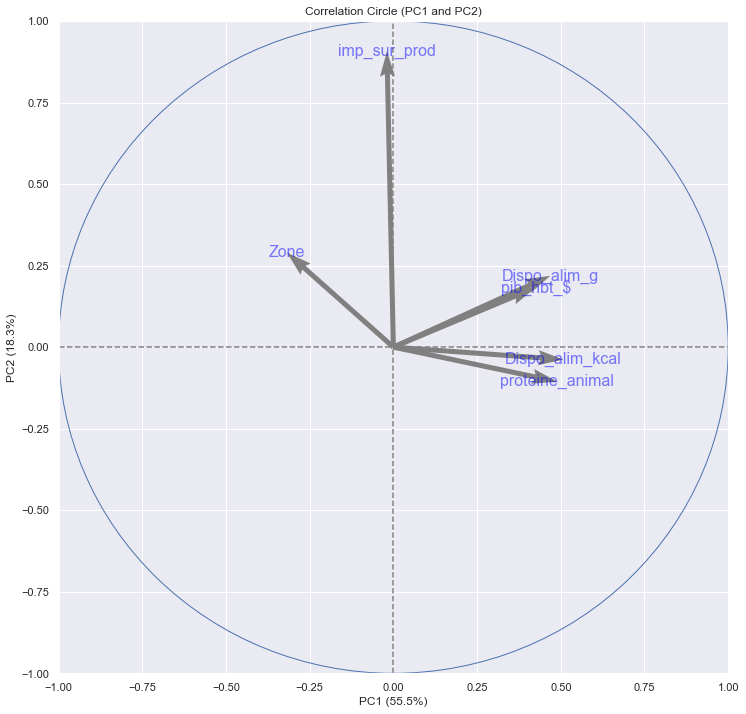

In [1015]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

Plus une variable possède une qualité de représentation élevée dans l’ACP, plus sa flèche est longue;
Plus deux variables sont corrélées, plus leurs flèches pointent dans la même direction (dans le cercle de corrélation, le coefficient de corrélation est symbolisé par les angles géométriques entre les flèches);
Plus une variable est proche d’un axe principal de l’ACP, plus elle est liée à lui. Cette dernière règle permet généralement de donner un sens concret aux axes de l’ACP

Plus la valeur de l’axe 2 est positive, et plus le pays est riche (pib important). Au contraire, plus les valeurs sont négatives, et plus le pays a un taux de dépendance aux importations plus grand.

La composante F1 représente 55.5% de l'inertie totale et semble regrouper les variables:

Dispo_alim(Kcal/personne/jour) Dispo_proteine(g/personne/jour) proteines_animal(%) % evolution_pop(2017-2007)

On pourrait donc qualifier F1 comme un indice de clientèle potentielle: où plus cette variable est élevée, plus le pays en question est doué d'une forte disponibilité intérieure avec une production et un taux d'importation actifs de la viande de volaille, mais où le renouvellement de la clientèle n'est peut-être pas très potentiel. En revanche, F2 nous indiquera quels sont les pays à fort potentiel économique (PIB par habitant) est plus probable. Un pays présentant un résultat élevé pour F1 et F2 est alors un pays parfaitement envisageable pour notre importation, car il présentera toutes les caractéristiques conséquentes à un nouveau marché.

La composante F2 représente 18.3 % de l'inertie totale et semble regrouper les variables: PIB Disponiblilite alimaintaire kcal

Nous ne regarderons pas les autres composantes qui, selon le critère de Kaiser, représentent moins de variabilité qu’une variable initiale.

Ici, l’axe F2 reflète bien le PIB. Plus la valeur de l’axe 2 est positive, et plus le pays est riche.

Deux fleches proteine_animal et evolution_pop qui sont confondu, tres proche sont trés corrèle. 

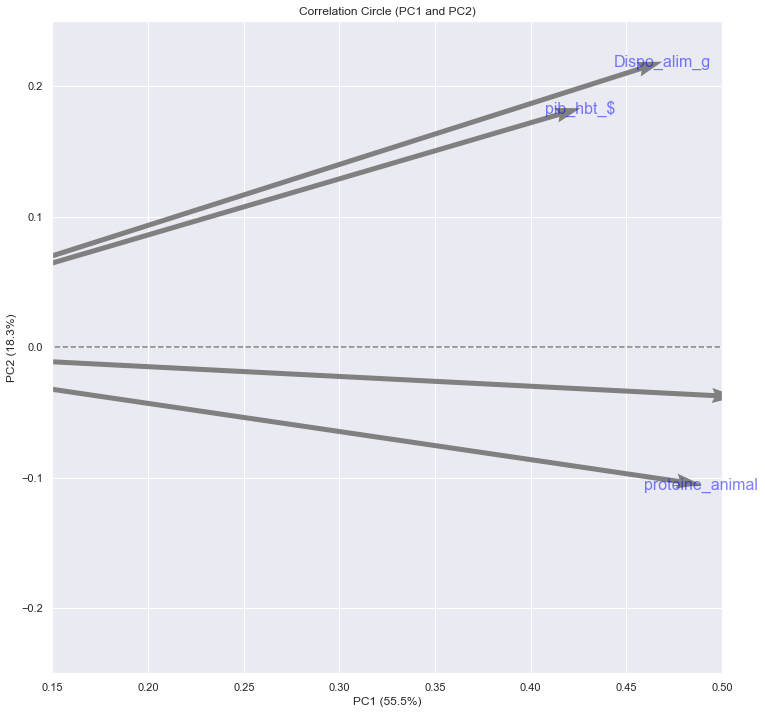

In [1016]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features),
               lims=[0.15, 0.5, -0.25, 0.25])



# Projection sur le premier plan factoriel

In [1017]:
# essai de interactive zoom

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

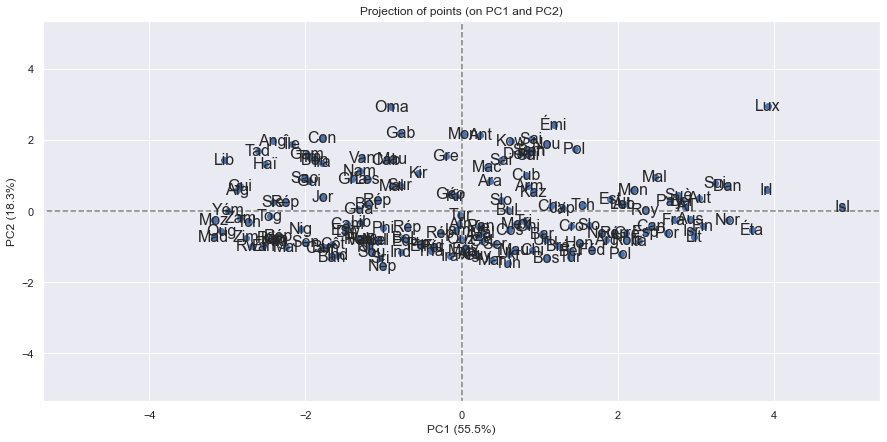

In [1018]:
# plan factoriel
X_projected = pca.transform(X_scaled)
display_factorial_planes( X_projected,n_comp, pca, [(0,1),(2,3),(4,5)], labels=data2.index) 
plt.show()


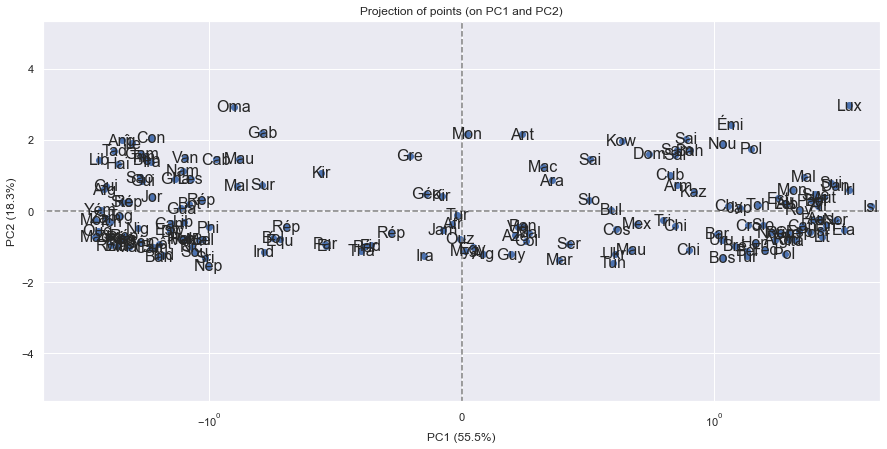

In [1019]:
# essai d'avoir le plus lisibles le plan factoriel par x_axe

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels=data2.index) 

plt.xscale('symlog', linthreshx=1.)

plt.show()




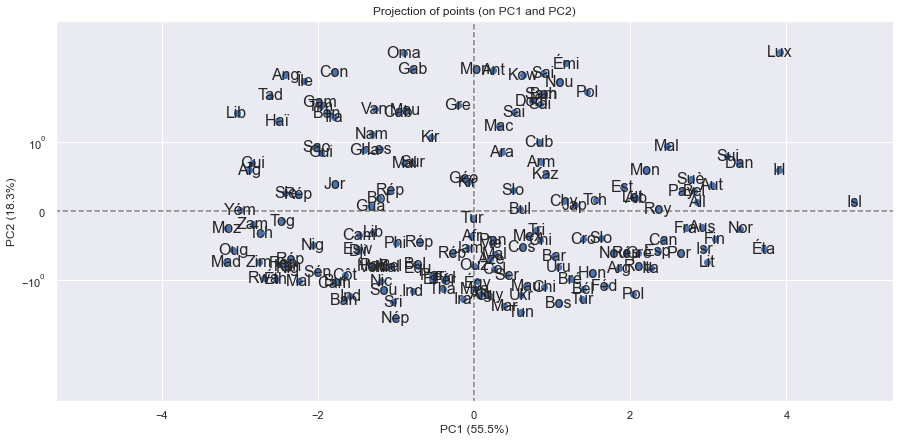

In [1020]:
# essai d'avoir le plus lisibles le plan factoriel par y-axe
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels=data2.index) 

plt.yscale('symlog', linthreshx=1.)

plt.show()


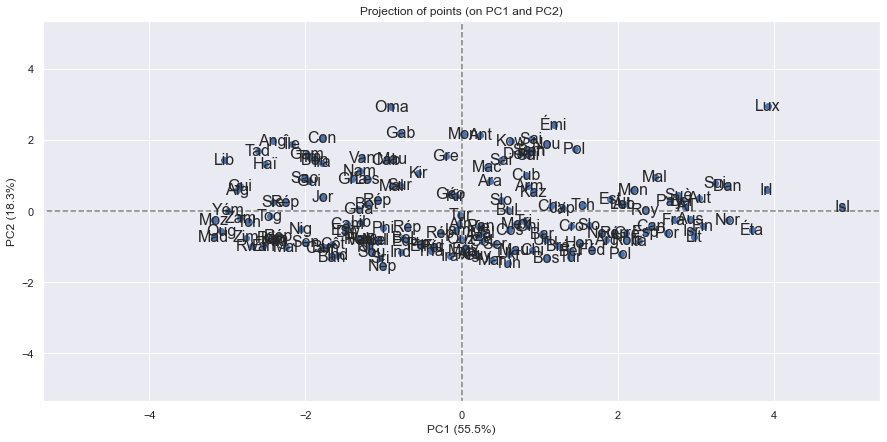

In [1021]:

display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],
                         labels=data2.index,
                         alpha=1)

Les pays à cibler sont les pays situés positivement selon l'axe des abscisses et des ordonnées 
Luxembourg, Spain, Emirates arabes unis, Malte, Cuba, Montenegro, Irland,Islanad...

In [1022]:
data2

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Zone,,,,,,
Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480
Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388
Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545
Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228
All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595
...,...,...,...,...,...,...
Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951
Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819
Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776


In [1023]:
data2 = data2.reset_index()

In [1024]:
data2

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0,Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480
1,Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388
2,Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545
3,Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228
4,All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595
...,...,...,...,...,...,...,...
164,Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951
165,Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819
166,Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776
167,Éth,-1.167845,-0.743995,-2.058448,-0.973517,-0.684930,1.110655


In [1025]:
# union data et composantes
final = pd.merge(data2,composantes,left_index=True, right_index=True)

final

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,F1,F2
0,Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480,-2.881381,0.604015
1,Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388,-0.037636,-0.370109
2,Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545,2.073614,0.191488
3,Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228,0.084797,-1.204156
4,All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595,2.858812,0.127470
...,...,...,...,...,...,...,...,...,...
164,Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951,1.180788,2.417764
165,Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819,-0.719245,-0.806354
166,Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776,3.714654,-0.546520
167,Éth,-1.167845,-0.743995,-2.058448,-0.973517,-0.684930,1.110655,-2.540523,-0.984887


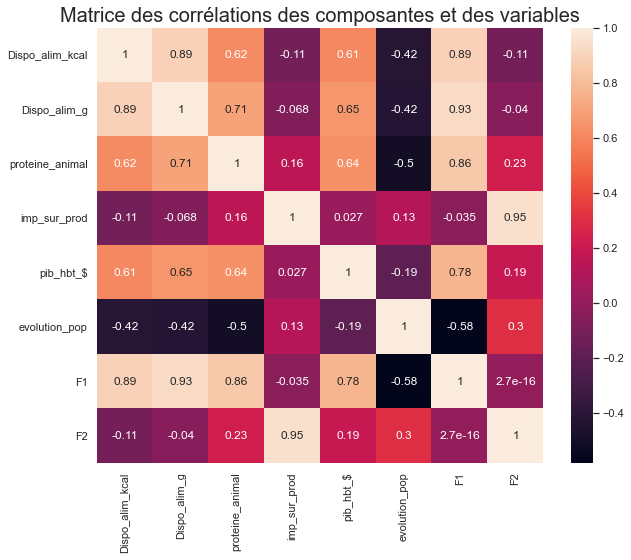

In [1026]:
sns.heatmap(final.corr(), annot=True)
plt.title("Matrice des corrélations des composantes et des variables", fontsize=20) ; plt.show()

Comme le montre la matrice , ces deux variables sont bien celles qui contribuent le plus à l’axe F2, l’une positivement et l’autre négativement.

F1 est fort corréle avec disponibilite alimaintaire(kcal, gr et proteine animal), PIB. Aussi fort corréle avec evolutin de population mais en negative sens. Plus un pays aura une croissance démographique forte et plus sa valeur sur l’axe F1 sera négative. Au contraire, plus la valeur de l’axe F1 sera positive et plus le pays aura un PIB élevé, une forte consommation en protéines animales et une forte disponibilité alimentaire en protéines et en kilocalories.

F2 est fort corréle avec taux d'importation.

# K-means

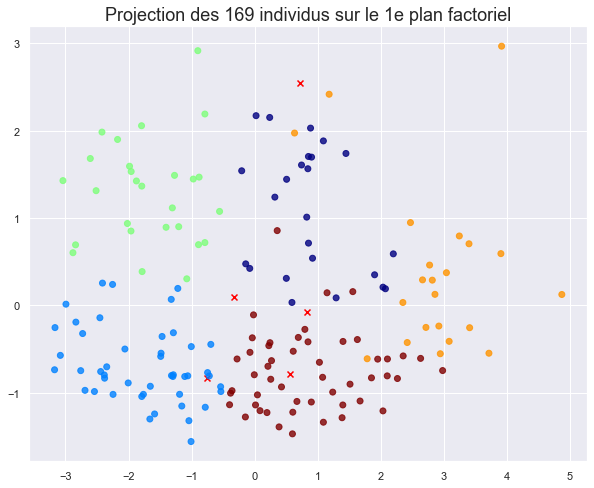

In [1027]:
n_clust = 5  
X = poulet.values
km = KMeans(n_clusters=n_clust)
km.fit(X)
clusters2 = km.labels_
#centroids_projected = pca.transform(centroids)
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
pca = decomposition.PCA(n_components=5).fit(X)
X_projected = pca.transform(X)


# Determine which clusters each data point belongs to:
cluster =  km.predict(X)

plt.scatter(centroids_projected[:,0],centroids_projected[:,1], marker="x",color='red')   
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters2.astype(np.float), cmap = 'jet', alpha=.8)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]), fontsize=18) 
plt.show()


In [1028]:
clusters2.astype(np.float).shape

(169,)

In [1029]:
clusters2.astype(np.float)

array([2., 4., 0., 4., 3., 2., 0., 4., 4., 0., 3., 3., 4., 0., 1., 4., 3.,
       1., 1., 4., 1., 4., 0., 1., 4., 2., 2., 1., 1., 3., 4., 4., 4., 4.,
       2., 4., 4., 0., 1., 3., 1., 0., 1., 4., 0., 1., 4., 3., 3., 4., 2.,
       2., 2., 0., 4., 1., 2., 2., 4., 0., 2., 1., 4., 1., 1., 4., 2., 3.,
       3., 3., 4., 4., 0., 2., 0., 1., 2., 0., 3., 2., 0., 1., 2., 4., 3.,
       0., 1., 4., 1., 2., 1., 3., 4., 4., 2., 4., 0., 0., 1., 4., 2., 1.,
       1., 1., 3., 0., 3., 1., 2., 1., 4., 1., 4., 1., 3., 1., 4., 0., 4.,
       4., 4., 3., 1., 1., 4., 1., 4., 2., 1., 1., 0., 0., 0., 0., 2., 4.,
       1., 0., 4., 1., 1., 3., 2., 3., 1., 2., 1., 4., 4., 2., 1., 4., 4.,
       4., 4., 4., 4., 2., 1., 4., 1., 1., 1., 4., 3., 1., 3., 1., 2.])

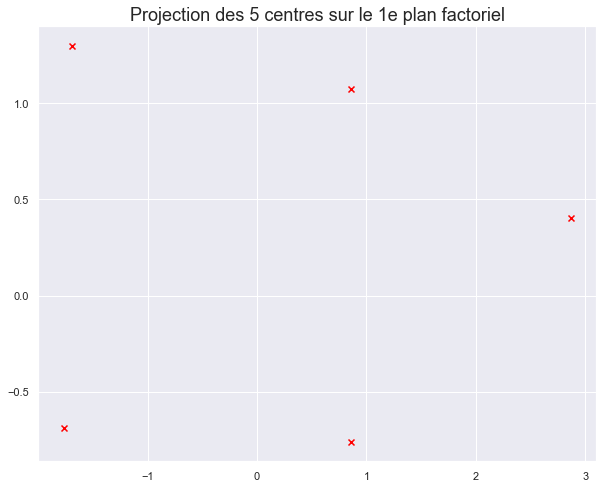

In [1030]:
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

plt.scatter(centroids_projected[:,0],centroids_projected[:,1], marker="x",color='red')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)), fontsize=18) ; plt.show()

In [1031]:
data2["cluster"]=km.labels_ 

In [1032]:
centroids_projected

array([[ 0.85900658,  1.07180057, -1.05567325, -0.12788063,  0.12787446],
       [-1.76459786, -0.68674096,  0.21968347,  0.26258963, -0.0582349 ],
       [-1.69196229,  1.29586003,  0.08731277, -0.22514102, -0.06188809],
       [ 2.86860713,  0.40124161,  1.07767186,  0.44887418, -0.3226732 ],
       [ 0.86257937, -0.75897331, -0.21671015, -0.25612824,  0.16759215]])

In [1033]:
data2

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480,2
1,Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388,4
2,Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545,0
3,Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228,4
4,All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595,3
...,...,...,...,...,...,...,...,...
164,Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951,3
165,Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819,1
166,Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776,3
167,Éth,-1.167845,-0.743995,-2.058448,-0.973517,-0.684930,1.110655,1


In [1034]:
data1=data2.copy()
clust = pd.DataFrame(data1.groupby("cluster").mean())
clust.to_csv("P5_05_centroides.csv") 
clust

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
cluster,,,,,,
0,0.133478,0.339174,0.885828,1.244593,-0.023843,-0.755222
1,-0.919964,-0.902951,-0.986871,-0.697988,-0.595310,0.481559
2,-0.781641,-0.855756,-0.636660,1.250488,-0.554956,0.993634
3,1.349939,1.411454,1.128153,-0.021005,2.181400,-0.103680
4,0.610411,0.508980,0.330133,-0.621277,-0.101010,-0.571471


Nous avons vu en introduction que nous allions cibler les pays présentant les plus hauts résultats pour chacune des variables étudiées. Pour cibler un nombre raisonnable de pays, cette projection nous indique qu'on pourra cibler deux clusters en premier lieux, ceux dont les pays se situent le plus à droite selon l'axe des abscisses du 1er plan factoriel ci-dessus.

On affiche ici les positions des centres de classe sur le plan factoriel.

En contrastant la projection des centroïdes à la projection précédente, celle-là nous confirme que 2 groupes de pays semblent être un meilleur choix pour nos importations. Nous allons développer cette théorie lors du partitionnement ci-dessous.

Les centroïdes des groupes et leurs coordonnées dans chacune des dimensions.



<Figure size 720x720 with 0 Axes>

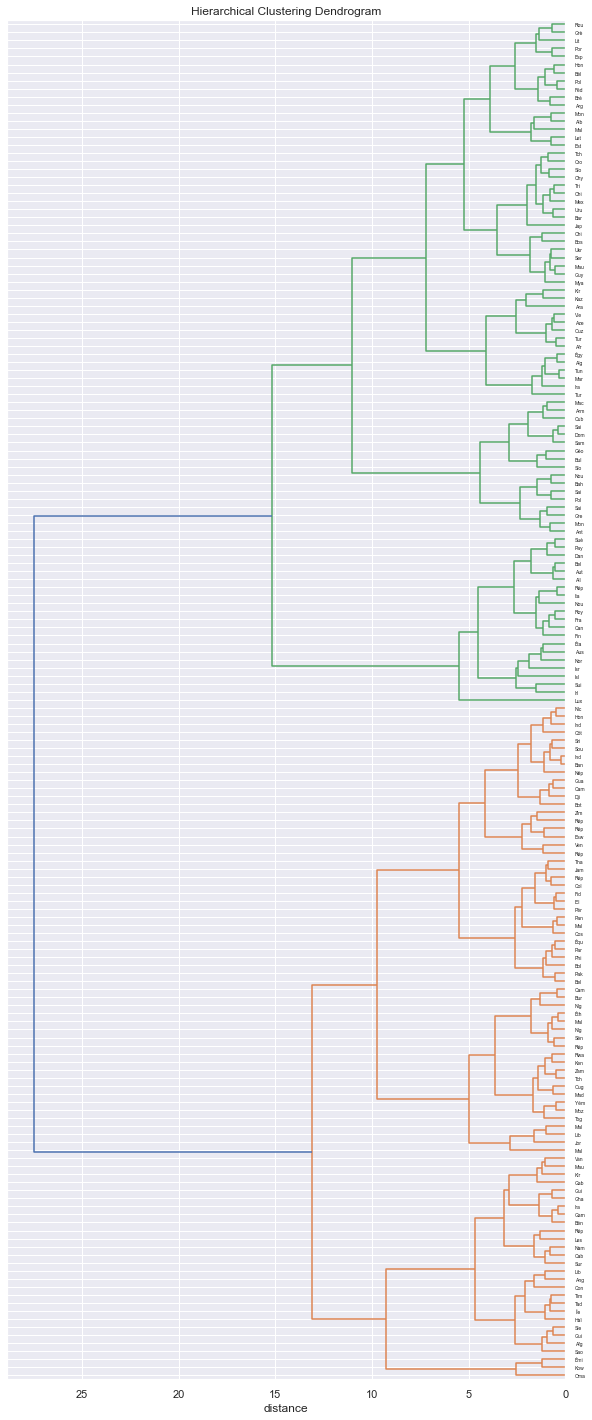

In [1035]:
plt.figure(figsize=(10, 10))


#Préparation des données pour le clustering:
X = poulet.values
names = poulet.index

#Clustering hiérarchique:
Z = linkage(X, 'ward')


#Visualisation du dendogramme
plot_dendrogram(Z, names)
plt.savefig('P5_02_dendrogram.jpeg', format='jpg', bbox_inches='tight')
plt.show()

In [1036]:
fcluster(Z, t=5, criterion='distance')

array([ 2,  9, 11,  9,  6,  2,  8,  9, 11,  8,  6,  6,  9,  8,  5, 10,  6,
        4,  4, 10,  5, 11,  8,  3, 11,  2,  2,  5,  3,  6, 10, 10, 10,  4,
        2,  4, 10,  8,  5,  6,  5,  8,  4, 11, 11,  5,  4,  6,  6, 11,  2,
        2,  2,  8, 11,  5,  2,  2, 10,  8,  2,  5, 11,  5,  5,  9,  2,  6,
        6,  6,  6,  4, 10,  3,  9,  3,  2,  9,  1,  2, 11,  3,  2, 11,  7,
        8,  3,  4,  3,  3,  3, 11,  9, 10,  2, 10,  8, 11,  3, 10,  2,  5,
        3,  3,  6,  8,  6,  5,  1,  3,  9,  4,  4,  4,  6,  4, 11,  8, 11,
        4, 11,  6,  3,  5,  6,  5,  4,  2,  5,  3,  8,  8,  8,  8,  2, 10,
        2,  8, 10,  5,  5,  6,  2,  6,  3,  2,  3, 10,  4,  2,  3, 10,  9,
        9,  9, 10, 10,  2,  5,  9,  3,  3,  5,  9,  1,  4,  6,  3,  2],
      dtype=int32)

In [1037]:
fcluster(Z, t=40, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [1038]:
fcluster(Z, t=10, criterion='distance')

array([1, 5, 5, 5, 3, 1, 4, 5, 5, 4, 3, 3, 5, 4, 2, 5, 3, 2, 2, 5, 2, 5,
       4, 2, 5, 1, 1, 2, 2, 3, 5, 5, 5, 2, 1, 2, 5, 4, 2, 3, 2, 4, 2, 5,
       5, 2, 2, 3, 3, 5, 1, 1, 1, 4, 5, 2, 1, 1, 5, 4, 1, 2, 5, 2, 2, 5,
       1, 3, 3, 3, 3, 2, 5, 2, 5, 2, 1, 5, 1, 1, 5, 2, 1, 5, 3, 4, 2, 2,
       2, 2, 2, 5, 5, 5, 1, 5, 4, 5, 2, 5, 1, 2, 2, 2, 3, 4, 3, 2, 1, 2,
       5, 2, 2, 2, 3, 2, 5, 4, 5, 2, 5, 3, 2, 2, 3, 2, 2, 1, 2, 2, 4, 4,
       4, 4, 1, 5, 1, 4, 5, 2, 2, 3, 1, 3, 2, 1, 2, 5, 2, 1, 2, 5, 5, 5,
       5, 5, 5, 1, 2, 5, 2, 2, 2, 5, 1, 2, 3, 2, 1], dtype=int32)

Au départ, chaque classe étant réduite à un élément, l’inertie intra-classe est nulle et l’inertie totale se confond avec l’inertie inter-classe. A l’arrivée, lorsque tous les éléments du nuage sont réunis en une seule classe, l’inertie inter-classe est nulle et l’inertie totale est égale à l’inertie intra-classe. Ainsi, lors du passage d’une partition en q classes à une partition en q-1 classes l’inertie intra-classe augmente et l’inertie inter-classe diminue de la même quantité.

L’inertie inter-classe est l’inertie existant entre les classes, c’est-à-dire mesurée à partir des centres de gravité des classes.

L’inertie intra-classe est l’inertie à l’intérieur des classes.

La distance qui est l'axe des abcisses du dendrogram présente la distance inter-classes (t). Une petite valeur de distance inter-classe ne permet pas aux observations de former des clusters. En l'occurence, si on prend une distance égale par exemple à 5, onn obtient un nombre de cluster égal à 11. Dans ce cas, l'inertie intra-classe est nulle et l'inertie totale est égale à l'inertie inter-classe.

Si on prend une grande valeur de distance inter-classe, dans ce cas toutes les observations seront mis dans un unique cluster. Par exemple, si je prends t=40, j'ai toute ma data appartenant à un seul cluster. Dans ce cas, l'inertie inter-classe est nulle est l'inertie totale est réduite à l'inertie intra-classe.

Et donc il faut chercher une valeur optimale pour regrouper notre data en un nombre donné de cluster. Ici dans notre cas, pour avoir 5 clusters, onn prend t=10.

In [1039]:
#Grouper les différents pays dans 5 clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 3, 3, 3, 2, 1, 4, 3, 3, 4, 2, 2, 3, 4, 0, 3, 2, 0, 0, 3, 0, 3,
       4, 0, 3, 1, 1, 0, 0, 2, 3, 3, 3, 0, 1, 0, 3, 4, 0, 2, 0, 4, 0, 3,
       3, 0, 0, 2, 2, 3, 1, 1, 1, 4, 3, 0, 1, 1, 3, 4, 1, 0, 3, 0, 0, 3,
       1, 2, 2, 2, 2, 0, 3, 0, 3, 0, 1, 3, 1, 1, 3, 0, 1, 3, 2, 4, 0, 0,
       0, 0, 0, 3, 3, 3, 1, 3, 4, 3, 0, 3, 1, 0, 0, 0, 2, 4, 2, 0, 1, 0,
       3, 0, 0, 0, 2, 0, 3, 4, 3, 0, 3, 2, 0, 0, 2, 0, 0, 1, 0, 0, 4, 4,
       4, 4, 1, 3, 1, 4, 3, 0, 0, 2, 1, 2, 0, 1, 0, 3, 0, 1, 0, 3, 3, 3,
       3, 3, 3, 1, 0, 3, 0, 0, 0, 3, 1, 0, 2, 0, 1], dtype=int64)

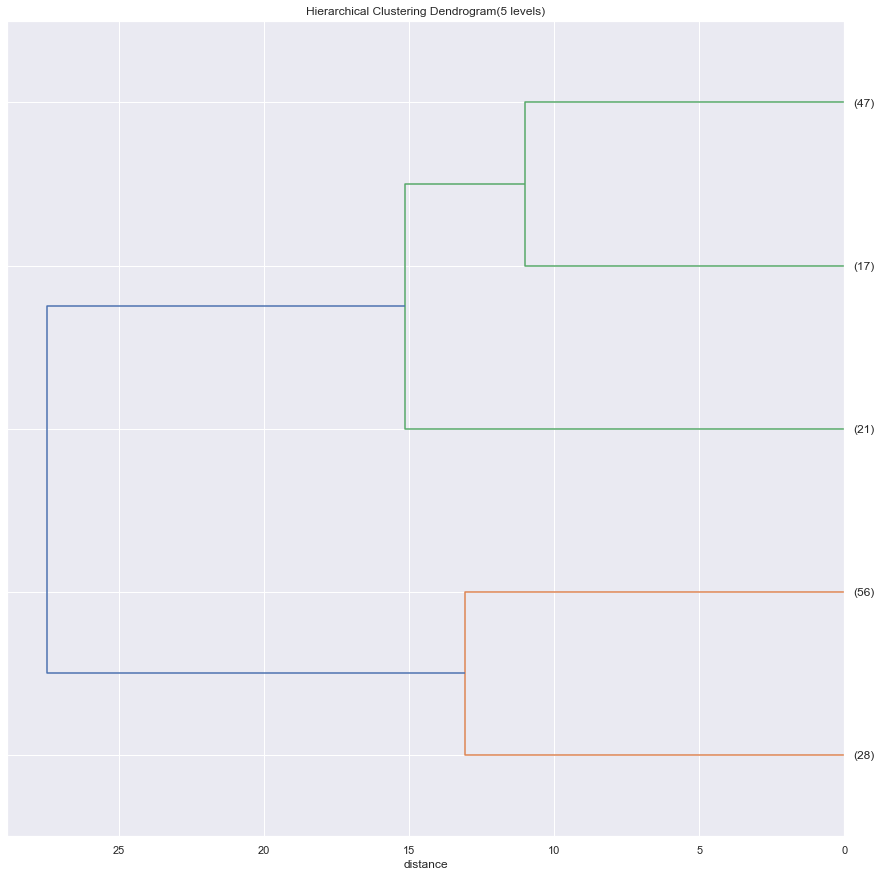

In [1040]:
#Affichage du dendrogramme avec 5 groupes
from scipy.cluster import hierarchy
plt.figure(figsize=(15,15))
plt.title('Hierarchical Clustering Dendrogram(5 levels)')
plt.xlabel('distance')
hierarchy.dendrogram(Z, labels = cluster.labels_, orientation = "left", p=5, truncate_mode='lastp' )
plt.savefig('P5_03_den.jpg', format='jpg', bbox_inches='tight')

plt.show()

Nous voyons le nombre de pays qui existent dans chaque cluster. Graphiquement, on voit bien que la méthode de Ward a permis de minimiser les distances intra-classes à chaque regroupement.

In [1041]:
#Ajouter une colonne cluster à la dataframe
data2['cluster'] =cluster.labels_

In [1042]:
data2

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480,1
1,Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388,3
2,Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545,3
3,Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228,3
4,All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595,2
...,...,...,...,...,...,...,...,...
164,Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951,1
165,Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819,0
166,Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776,2
167,Éth,-1.167845,-0.743995,-2.058448,-0.973517,-0.684930,1.110655,0


In [1043]:
data["cluster"]=cluster.labels_ 
data

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
...,...,...,...,...,...,...,...,...
164,Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384,1
165,Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415,0
166,Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262,2
167,Éth,2334.0,66.26,9.990945,1.388889,721.753494,31.888173,0


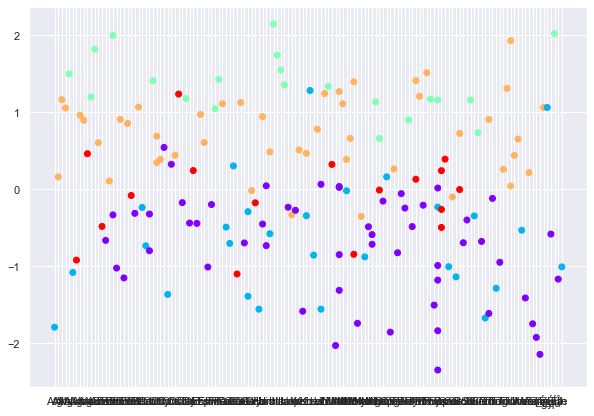

In [1044]:
#Visualiser les clusters
plt.figure(figsize=(10, 7))

plt.scatter(data2.iloc[:,0], data2.iloc[:,1], c=cluster.labels_, cmap='rainbow')

In [1045]:
data

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
...,...,...,...,...,...,...,...,...
164,Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384,1
165,Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415,0
166,Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262,2
167,Éth,2334.0,66.26,9.990945,1.388889,721.753494,31.888173,0


In [1046]:
data.to_csv("P5_04_list_pays_CAH.csv")

In [1047]:
data[data['cluster']==0]



,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
14,Ban,2562.0,60.68,20.731707,0.000000,1538.233627,11.933971,0
17,Bel,2712.0,66.71,37.685504,0.000000,4887.559820,25.664744,0
18,Bol,2399.0,73.46,48.829295,0.197239,3351.127399,17.099194,0
20,Bot,2341.0,64.66,40.071141,37.500000,7893.388428,17.575484,0
23,Bur,2721.0,77.68,14.379506,0.000000,734.996282,34.670262,0
27,Cam,2501.0,66.20,29.093656,27.027027,1385.260419,17.028169,0
28,Cam,2717.0,71.05,16.143561,0.000000,1425.106072,31.156984,0
33,Col,3109.0,72.32,51.590155,4.750305,6376.707362,11.825827,0
35,Cos,3010.0,80.37,56.675376,11.333333,11814.626771,12.380750,0
38,Côt,2784.0,59.67,24.635495,2.173913,2111.026809,27.469448,0


In [1048]:
data[data['cluster']==1]

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
5,Ang,2373.0,52.02,31.353326,91.118421,4095.811686,42.627354,1
25,Bén,2756.0,64.22,20.274058,88.976378,1136.593360,32.175891,1
26,Cab,2530.0,70.61,37.855828,92.307692,3292.638357,13.143182,1
34,Con,2244.0,56.85,46.684257,93.693694,2154.629048,31.850828,1
50,Gab,2640.0,80.69,48.172016,95.000000,7230.389368,40.218529,1
51,Gam,2544.0,65.61,25.499162,88.888889,679.778473,35.005744,1
52,Gha,3000.0,60.97,25.028703,72.248804,2025.820309,26.813854,1
56,Gui,2731.0,57.42,19.975618,71.153846,855.575057,26.784131,1
57,Gui,2233.0,43.88,21.695533,57.142857,738.550286,29.513943,1


In [1049]:
data[data['cluster']==2]

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
10,Aus,3406.0,105.35,66.929283,1.243201,57628.863849,17.537845,2
11,Aut,3687.0,107.42,59.532675,42.635659,47306.411842,6.088285,2
16,Bel,3768.0,98.52,59.541210,40.258065,44020.066762,6.750840,2
29,Can,3501.0,104.72,52.931627,11.375000,44906.748920,11.543302,2
39,Dan,3397.0,115.64,66.032515,46.666667,57938.797728,4.796285,2
47,Fin,3337.0,118.22,63.238031,11.034483,46310.120883,4.032513,2
48,Fra,3510.0,109.36,58.732626,22.429078,38720.645922,4.805753,2
67,Irl,3835.0,115.46,60.523125,40.408163,71391.006104,9.911528,2
68,Isl,3652.0,144.80,72.727901,16.666667,73231.725965,9.571306,2


In [1050]:
data[data['cluster']==3]

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
7,Ara,3299.0,88.57,38.636107,57.943925,20802.465306,31.434221,3
8,Arg,3269.0,105.69,64.017409,0.368664,14627.615635,10.716695,3
12,Aze,3137.0,92.41,35.028677,20.610687,4150.868844,12.850135,3
15,Bar,2911.0,87.31,57.026687,11.111111,17392.010677,2.702548,3
19,Bos,3274.0,97.07,37.313279,14.084507,5394.741461,-10.929694,3
21,Bré,3250.0,94.12,56.449214,0.021170,9925.419442,9.311176,3
24,Bél,3346.0,93.01,55.574669,4.338843,5790.908054,-0.319434,3


In [1051]:
data[data['cluster']==4]

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
6,Ant,2446.0,80.43,64.291931,100.000000,15383.415188,13.567229,4
9,Arm,3072.0,97.70,46.683726,76.086957,3914.525246,0.415090,4
13,Bah,2644.0,81.62,64.297966,78.787879,32719.152336,13.149806,4
22,Bul,2826.0,85.49,48.333138,50.232558,8300.173316,-6.259054,4
37,Cub,3423.0,87.07,39.003101,91.495601,8541.214440,0.783317,4
41,Dom,2973.0,82.08,57.882554,100.000000,7274.669503,0.936507,4
53,Gre,2364.0,72.03,57.337221,87.500000,10152.836673,5.403555,4
59,Géo,2783.0,74.95,39.639760,69.863014,4051.839171,-3.795442,4
85,Mac,3009.0,82.98,42.938057,95.238095,5430.875559,0.802256,4
96,Mon,2480.0,84.61,66.032384,100.000000,3669.409235,20.046341,4


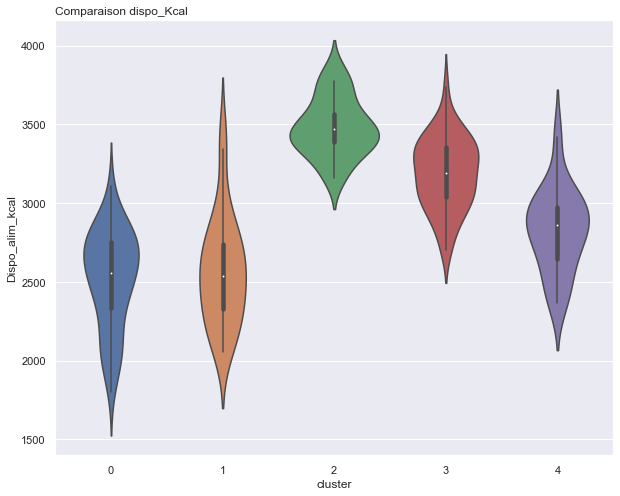

In [1052]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='Dispo_alim_kcal', data=data)
plt.title("Comparaison dispo_Kcal", loc="left")
plt.show()

Pour le disponibilite alimaintaire ( Kcal/j/hab ) - cluster 2 est en premier place 3200 kcal - 3800 kcal, ensuite cluster 3 2600 kcal - 3700 kcal.

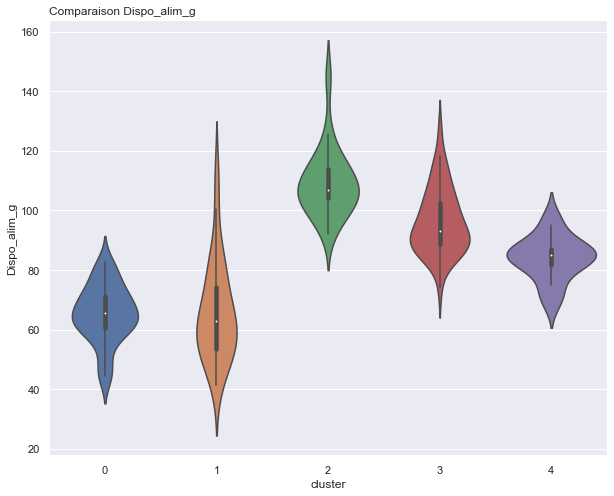

In [1053]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='Dispo_alim_g', data=data)
plt.title("Comparaison Dispo_alim_g", loc="left")
plt.show()

Pour le disponibilite alimaintaire ( g/j/hab ) - cluster 2 est en premier place 90g - 130g, ensuite cluster 3 70g - 120g.

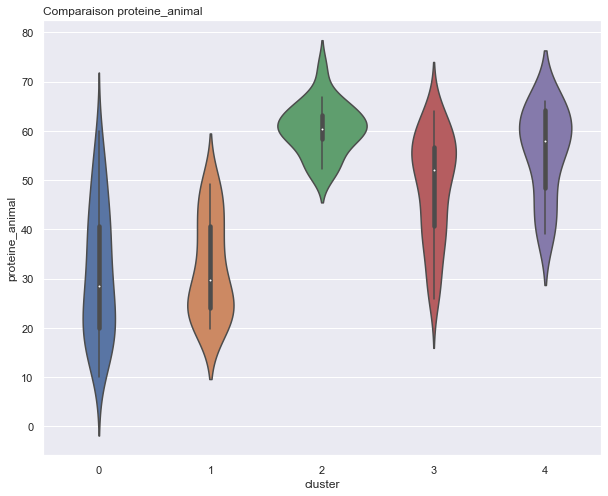

In [1054]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='proteine_animal', data=data)
plt.title("Comparaison proteine_animal", loc="left")
plt.show()

Pour le proteine animal - cluster 2 est en premier place 55 % - 65 %, ensuite cluster 4 39 % - 65 %.

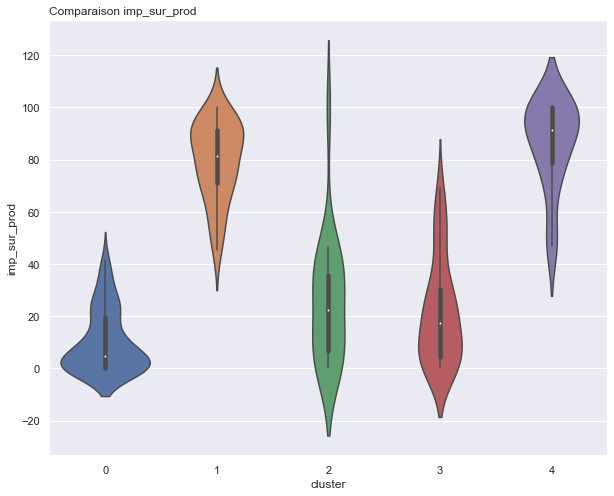

In [1055]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='imp_sur_prod', data=data)
plt.title("Comparaison imp_sur_prod", loc="left")
plt.show()

Pour le taux d'importation - cluster 4 est en premier place 45 % - 65 %, ensuite cluster 1 45 % - 100 %.

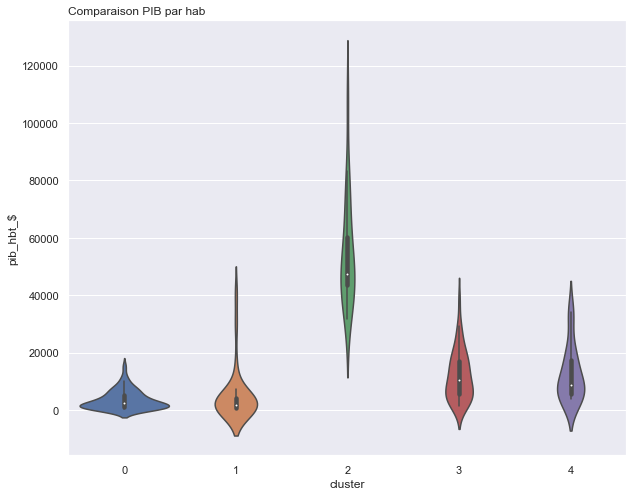

In [1056]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='pib_hbt_$', data=data)
plt.title("Comparaison PIB par hab", loc="left")
plt.show()

Nous voyons que le cluster 2 a PIB par habitant le plus élévé des autres cluster. Donc dans le cluster 2 sont les pays qui sont le plus riches.

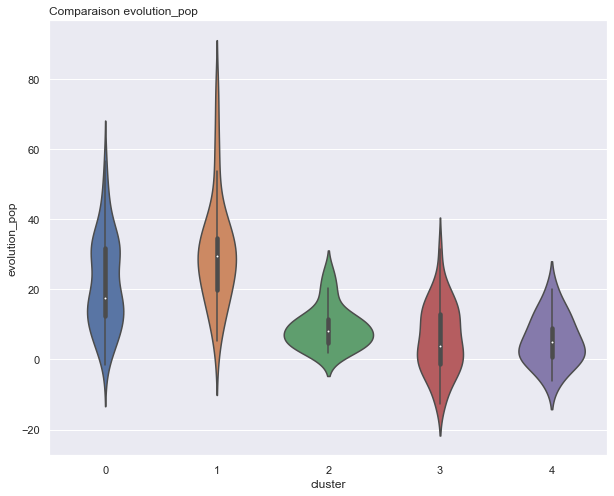

In [1057]:
# Visualisation du violin chart pour la variable pib par habitant en $
sns.violinplot( x='cluster', y='evolution_pop', data=data)
plt.title("Comparaison evolution_pop", loc="left")
plt.show()

Pour l'evolution de population - cluster 1 est en premier place 5 % - 55 %, ensuite cluster 0 -1 % - 60 %.

In [1058]:
#data2["cluster"]=cluster.labels_ 

In [1059]:
data2.set_index("Zone")

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
Zone,,,,,,,
Afg,-1.792127,-1.242315,-1.429755,0.491696,-0.696206,1.249480,1
Afr,0.160133,0.113511,-0.002118,-0.316239,-0.393098,0.035388,3
Alb,1.161632,1.817175,0.766360,0.779741,-0.479979,-1.391545,3
Alg,1.053541,0.566440,-0.858871,-0.994834,-0.501839,0.380228,3
All,1.496935,1.120513,1.155879,0.043482,1.683733,-0.940595,2
...,...,...,...,...,...,...,...
Émi,1.060158,1.559627,0.217430,1.674302,1.472578,2.598951,1
Équ,-0.583270,-0.734127,0.266794,-1.014638,-0.388146,0.126819,0
Éta,2.017538,1.574429,1.436680,-0.998113,2.524864,-0.502776,2


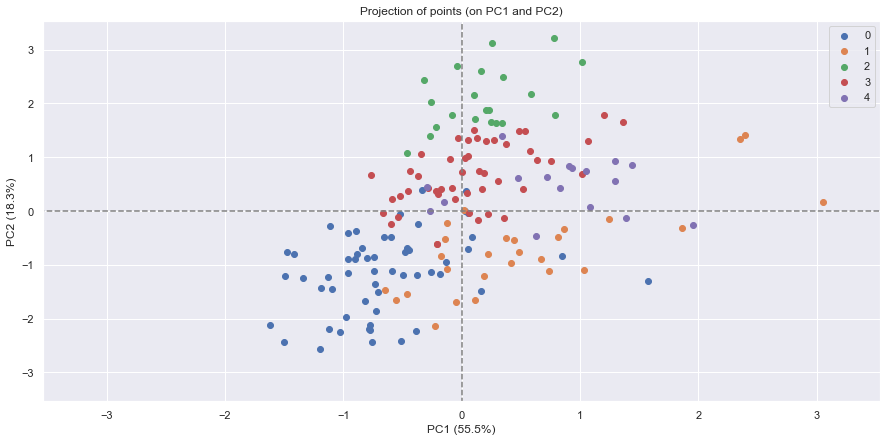

In [1060]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = data2["cluster"]) 
plt.show()

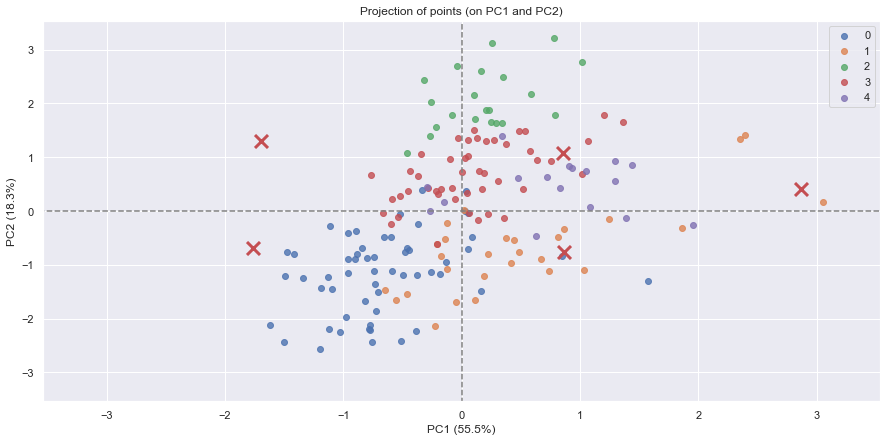

In [1061]:
display_factorial_planes(X_projected, 2, pca, [(0,1)], illustrative_var =data2["cluster"], alpha = 0.8)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

In [1062]:
data2.set_index("Zone", inplace=True)

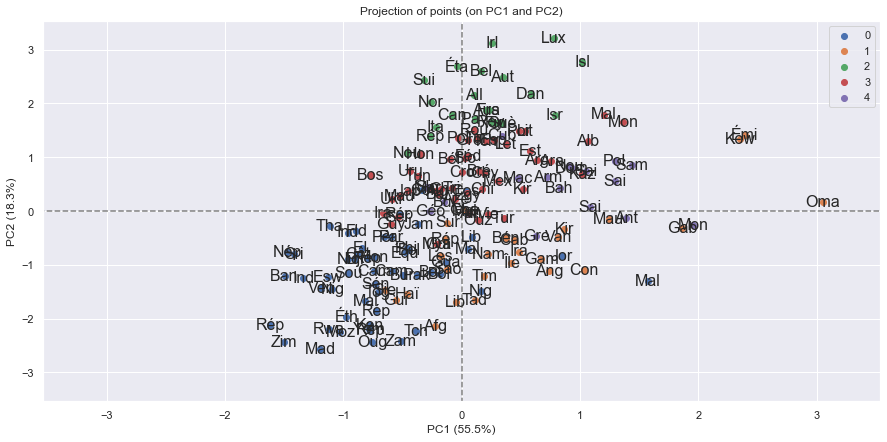

In [1063]:

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = data2["cluster"], labels=data2.index) 

plt.show()

In [1064]:
data1=data2.copy()
clust = pd.DataFrame(data1.groupby("cluster").mean())
clust.to_csv("P5_06_centroides.csv") 
clust

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
cluster,,,,,,
0,-0.762227,-0.790488,-0.713437,-0.714930,-0.532415,0.422510
1,-0.654096,-0.769616,-0.657149,1.337459,-0.450804,1.008404
2,1.361953,1.373597,1.164830,-0.269951,2.228419,-0.432578
3,0.718566,0.737645,0.410270,-0.379135,-0.076480,-0.659531
4,-0.080834,0.135394,0.859324,1.533854,-0.044970,-0.694930


In [1065]:
#Calcul des coordonnées des centroides
#coord_centroid = pd.DataFrame(np.around(X_projected, 2),
                              #index=data2.index,
                              #columns=['Coord_F' + str(i + 1) for i in range(p)])

#Sauvegarde de la table des centroides avec leurs coordonnées dans chaque dimension
#coord_centroid.to_csv('created_csv/coord_centroid.csv')
#coord_centroid

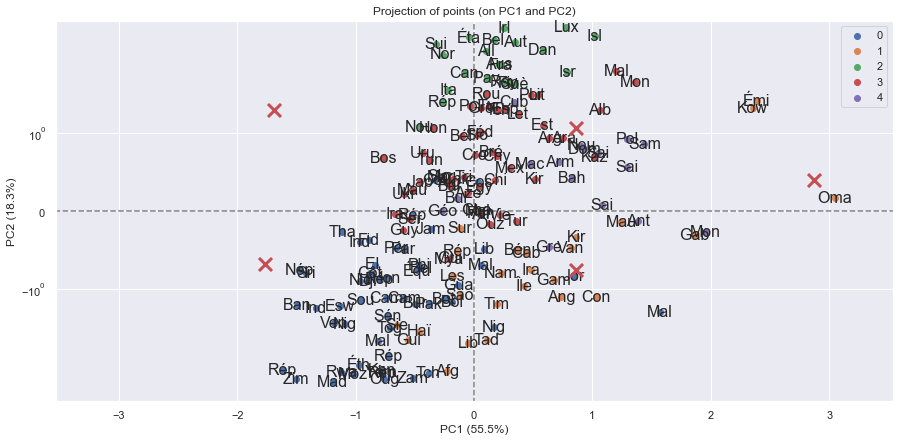

In [1066]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = data2["cluster"], labels=data2.index) 
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
plt.yscale('symlog', linthreshx=2.)

plt.show()

Quand on projette le nuage des pays sur le premier plan factoriel, nous voyons que l’ACP a plutôt bien discriminé les différents clusters qui se chevauchent assez peu. Afin de réduire la liste, on peut écarter les pays ayant une valeur négative sur l’axe F1. Nous allons observer les clusters 2,3

Les pays plus proche de centroides sont Oman, Albanie, pour le cluster 2 plus proche de centroide est Allemagne, Belique; États-Unis...

# Description et critique des cinq clusters à partir des résultats obtenus

• GROUPE 1 (cluster 0 ): Ce sont des pays pauvre, le PIB par habitant et l'importation de viande de volaille sont faibles, relativement peuplés où l'évolution de la population est très forte, tels que la Liban avec 43 % taux de croissance. On y trouvera, entre autres, une grande partie de l'Afrique Subsaharienne, ainsi que plusieurs pays d'Asie Centrale et plusieurs pays d'Amérique du Sud. On y trouve les pays où la disponibilité intérieure, le PIB par habitant et l'importation de viande de volaille sont faibles. Les conditions pour ne pas cibler ces pays sont donc réunies, et on pourra écarter le groupe 1 de nos pays-cibles.

• GROUPE 2 ( cluster 1 ): On y trouvera, entre autres, une grande partie de l'Afrique Subsaharienne, ainsi que plusieurs pays du Moyen-Orient, et quelques pays océaniques à faible superficie. Mais aussi il y a beacoup de pays qui sont très pauvre par example Haiti. Où l'évolution de la population est très forte En effet, les pays du groupe 2 disposent d'un taux d'importation de viande de volaille est presque aussi significatif que celui du groupe 5, donc le marché de la volaille nous y est ouvert, mais les conditions économiques persistent à nous dispenser de ces pays pour nos premières exportations.

• GROUPE 3 ( cluster 2 ): Ce sont des pays parmi les plus riches du monde. On y trouve en grande majorité des pays européens (dont la France, l'Allemagne et la Belgique), ainsi que quelques autres pays au potentiel commercial très important comme les États-Unis ou encore la Chine de Hong-Kong. Ce sont globalement les pays ayant d'ores et déjà de nombreux échanges commerciaux avec la France. Les pays du groupe 2 sont ceux ayant les plus faibles augmentations démographiques mais ayant la plus grande disponibilité alimentaire (que ce soit en protéines ou en kcalories) par habitant et surtout où la consommation animale est la plus importante. La proximité des pays européens avec la France est un critère idéal à la potentielle exportation de notre marchandise, la plupart d'entre eux faisant d'ailleurs partie de l'Union Européenne, les conditions de libre-échange sont très intéressantes pour nous. En revanche, ces pays semblent plus penchés sur la production locale que sur l'importation de viande de volaille et on constate un renouvellement de la clientèle assez faible en dépit d'une croissance de population médiocre depuis 2007. Cependant, les conditions de choix de pays-cibles définies en introduction demeurent globalement présents. Si l'on écarte le renouvellement de la clientèle et les tendances protectionnistes sur notre marché de ces pays-là, ils constituent visiblement un groupe à cibler pour nos premières exportations à l'étranger.

• GROUPE 4 ( cluster 3 ): Ce sont des pays productifs, relativement peuplés mais où l'évolution de la population n'y est pas très forte, tels que le Brésil, au potentiel commercial intéressant. La disponibilité alimentaire par habitant y est importante mais l'importation de volaille par rapport à la production y est faible. Beaucoup de ces pays ont une économie mal répartie (Brésil, Russie...). En conclusion, ces pays ne paraissent pas propices à notre projet. Malgré un bon pourcentage de protéine animale dans leur disponibilité alimentaire en protéine, les conditions économiques et productives de ces pays ne joueront probablement pas en faveur d'une exportation de viande de volaille rentable et prospère. Nous verrons par la suite que le groupe 4 devra être considérer après le groupe 3

• GROUPE 5 ( cluster 4 ): Ce sont pays d'Asie et petites iles. Aprés 3 et 4 groupe, c'est sont le groupe avec pas mal proportion de consomatiuon de produits animals. Comme on a mentionés les groupe 2 et groupe 5 ont un taux d'importation très élévé et où l'évolution de la population est très faible.

Pour nos premières exportations de viande de poulet à l'étranger, nous devrions cibler les pays des groupes 3 et 4: on devrait se concentrer en priorité sur les pays du groupe 3, puis analyser plus en profondeur les pays du groupe 3 susceptibles de faire prospérer notre marché. Ce sont clairement les deux groupes de pays identifiés précédemment sur le plan factoriel par l'algorithme des K-means. Ces deux groupes présentent globalement de meilleurs résultats que les autres sur l'ensemble de nos six variables. Les perspectives économiques et productives des pays des trois autres groupes (1, 2 et 5)(cluster 0,1,4 ) ne semblent pas réunir les critères nécessaires à l'essort de notre commerce. Ces pays doivent donc, en premier lieu, être écartés de nos projets, puis éventuellement analyser à nouveau en cas d'épuisement du potentiel des groupes 3 et 4 ( cluster 2,3 ).

# Test statistique

## Test d'adéquation

In [1071]:
data.head()

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
1,Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
2,Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
3,Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
4,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2


In [1076]:
shapi=data.drop(columns=["Zone","cluster"])

In [1077]:
shapi

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
0,2051.0,56.16,19.836182,50.877193,513.085978,33.931347
1,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776
2,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335
3,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007
4,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592
...,...,...,...,...,...,...
164,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384
165,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415
166,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262
167,2334.0,66.26,9.990945,1.388889,721.753494,31.888173


In [1078]:
def round3(a): return(round(a, 3))

pd.DataFrame({X: [round3(st.shapiro(shapi[X])[0]), round3(st.shapiro(shapi[X])[1])] for X in shapi},
             index=["Statistique de test", "pvalue"])

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop
Statistique de test,0.985,0.983,0.952,0.854,0.694,0.951
pvalue,0.077,0.041,0.000,0.000,0.000,0.000


On considère une marge de 1%. L'hypothèse H0(X) est : la variable X suit une loi normale de moyenne mean(X) et de variance Var(X).

Le test de Shapiro montre que pour les variables "Dispo_alim_kcal" et "Dispo_alim_g", la p-value>0.01, donc on peut rejeter l'hypothèse nulle à un nniveau de test de 1%.

On va considérer par la suite la variable "Dispo_alim_kcal" comme une variable qui suit la loi nnormale, et on l'utilisera pour le test de comparaison entre les groupes 3 et 4.

Le test de Shapiro ci-dessous nous indiquera si l'on peut rejeter cette hypothèse pour un niveau de test de 5%.

Ainsi, selon le test de Shapiro, la p-value observée pour la variable "Dispo_alim_g" représentant la disponibilité intérieure par habitant en gr est d'environ 0,041. Donc pour cette variable, pvalue>0,01 ce qui signifie qu'on ne peut pas rejeter H0 à un niveau de test de 1%. Nous pouvons donc considérer "Dispo_alim_g" comme suivant une loi gaussienne, et nous la choisirons pour effectuer un test de comparaison entre les groupes 3 et 4 issus de notre clustering.

<AxesSubplot:xlabel='Dispo_alim_kcal', ylabel='Density'>

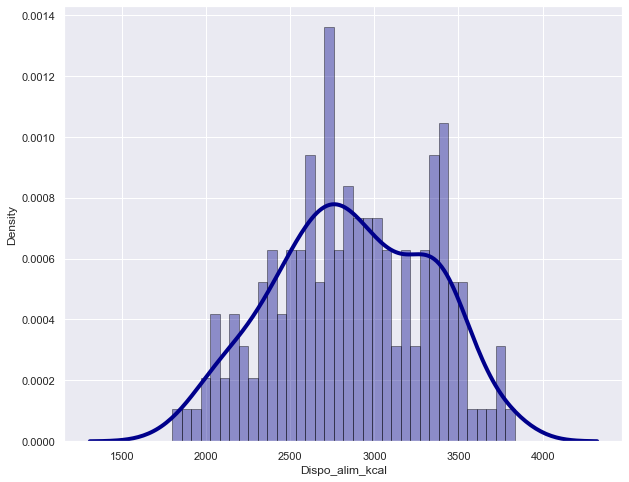

In [1079]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data['Dispo_alim_kcal'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [1080]:
d_kcal = pd.DataFrame(data['Dispo_alim_kcal'])

In [1081]:
#kurtosis et skewness
import scipy.stats as stats
print(
    stats.kurtosis(d_kcal, bias=False),
    stats.skew(d_kcal, bias=False) ,
    sep='\n'
)


[-0.70999322]
[-0.08049199]


Negative skewness 

Si la distribution donnée est décalée vers la droite et que sa queue se trouve du côté gauche, il s'agit d'une distribution négativement asymétrique. Elle est également appelée distribution asymétrique à gauche. La valeur de l'asymétrie de toute distribution présentant une asymétrie négative est toujours inférieure à zéro. L'asymétrie de la distribution donnée est à gauche ; par conséquent, la valeur moyenne est inférieure à la médiane et se déplace vers la gauche, et le mode se produit à la fréquence la plus élevée de la distribution.

L'asymétrie inclut également les extrêmes de l'ensemble de données au lieu de se concentrer uniquement sur la moyenne. Les investisseurs tiennent donc compte de l'asymétrie lorsqu'ils estiment la distribution des rendements des investissements. La moyenne de l'ensemble des données est utile si l'investisseur détient une position à long terme.

Negtive kurtosis

Par exemple, les données qui suivent une distribution t ont une valeur d'aplatissement positive. Une distribution avec une valeur d'aplatissement négative indique que la distribution a des queues plus légères et un pic plus plat que la distribution normale.



<AxesSubplot:xlabel='Dispo_alim_g', ylabel='Density'>

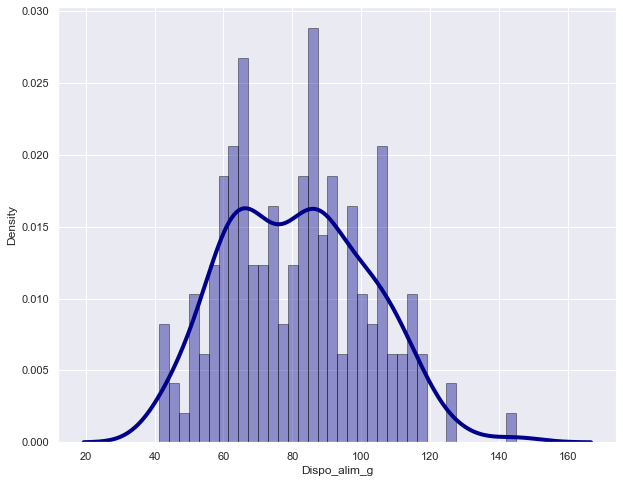

In [1082]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data['Dispo_alim_g'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Test de comparaison

Test de comparaison

Nous allons maintenant réaliser un test statistique afin de vérifier si la moyenne et la variance des groupes 3 et 4 diffèrent respectivement et de façon significative, avec un niveau de test de 1%, sur la variable "Dispo_alim_g".

Soient μ2 et μ5, respectivement les moyennes du groupe 3 et du groupe 4 sur la variable "Dispo_alim_g", et soient σ2² et σ5², respectivement les variances du groupe 3 et du groupe 4 sur la variable "Dispo_alim_g".

Formulons les hypothèses suivantes sur les moyennes:

Hypothèse nulle H0: μ2=μ5 Hypothèse alternative H1: μ2≠μ5 Formulons les hypothèses suivantes sur les variances:

Hypothèse nulle K0: σ2²=σ5² Hypothèse alternative K1: σ2²≠σ5²

In [1085]:
g2=data[data["cluster"]==2]["Dispo_alim_g"]
g5=data[data["cluster"]==3]["Dispo_alim_g"]

comp_var=st.bartlett(g2, g5)
comp_moy=st.ttest_ind(g2, g5, equal_var=True)
def round2(a): return(round(a, 2))


pd.DataFrame({"Test de comparaison des variances": [round2(comp_var[0]), round2(comp_var[1])],
              "Test de comparaison des moyennes": [round3(comp_moy[0]), round3(comp_moy[1])]},
             index=["statistic", "pvalue"])

,Test de comparaison des variances,Test de comparaison des moyennes
statistic,0.03,4.455
pvalue,0.85,0.000


In [1086]:
g2=data[data["cluster"]==2]["Dispo_alim_kcal"]
g5=data[data["cluster"]==3]["Dispo_alim_kcal"]

comp_var=st.bartlett(g2, g5)
comp_moy=st.ttest_ind(g2, g5, equal_var=True)
def round2(a): return(round(a, 2))


pd.DataFrame({"Test de comparaison des variances": [round2(comp_var[0]), round2(comp_var[1])],
              "Test de comparaison des moyennes": [round3(comp_moy[0]), round3(comp_moy[1])]},
             index=["statistic", "pvalue"])

,Test de comparaison des variances,Test de comparaison des moyennes
statistic,1.12,5.178
pvalue,0.29,0.000


Nous observons, avec une pvalue inférieure à 0,01 des deux tests de comparaisons, que l'on peut rejeter sereinement H0 et K0 pour un test statistique de niveau 1%, et par conséquent, admettre H1 et K1 qui indiquent respectivement que les moyennes et les variances diffèrent significativement. On en déduit que nos deux clusters diffèrent réellement. Une série de tests analogues aux résultats simillaires effectués en amont sur l'ensemble des groupes issus du clustering deux à deux nous permettent de conclure que nos cinq clusters diffèrent réellement deux à deux.

# Conclusion

Nous allons maintenant construire progressivement la table "cibles" qui nous renverra la liste des pays les plus propices à une insertion dans le marché du poulet selon nos données, ordonnée selon les perspectives les plus avantageuses. Pour cela, nous allons repartir de l'ensemble des pays, et "éliminer" progressivement ceux qui ne nous intéresserons pas dans un premier temps. Il nous faut désormais construire une liste des meilleurs Pays, les pays sur lesquels une étude plus poussée devra être faite en priorité :

Les pays présents dans la liste sont les pays les plus intéressants, présentant des chiffres proches de ceux de la France, et permettent donc une implantation plus facile et avec moins de risques

Pour ce choix des pays, nous allons donc prendre comme facteur déterminant les facilités d'imports/exports ; Les pays européens présentent un intérêt majeur : l'Union de l'Europe et l'space Schengen.

Ce dernier choix est beaucoup plus arbitraire que les précédents, cependant il s'inscrit dans une logique d'expansion en plusieurs phases :

Phase 1 : S'implanter des dans pays développés, ayant déjà un marché d'import de viandes de volailles, et présentant des facilités (imports/exports, langue). Phase 2 : S'implanter dans les pays développés avec un marché d'import de viandes de volailles déjà présent. Partons donc des 169 pays étudiés, et ajoutons les variables F1 et F2 obtenus lors de l'ACP.

In [571]:
data

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
Zone,,,,,,,
Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
...,...,...,...,...,...,...,...
Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384,1
Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415,0
Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262,2


In [572]:
target=data.copy()
target["F1"], target["F2"] = composantes["F1"], composantes["F2"]  
target.iloc[:, 6:9]

,cluster,F1,F2
Zone,,,
Afg,1,-2.881381,0.604015
Afr,3,-0.037636,-0.370109
Alb,3,2.073614,0.191488
Alg,3,0.084797,-1.204156
All,2,2.858812,0.127470
...,...,...,...
Émi,1,1.180788,2.417764
Équ,0,-0.719245,-0.806354
Éta,2,3.714654,-0.546520


Suite au clustering de la partie II, nous avons estimé que les groupes de pays à viser en priorités étaient les groupes 2 et 3. En introduction, nous avons bien indiqué que nous ciblerions les pays représentant globalement les plus hautes valeurs pour chacune de nos six variables de base. Lors de l'ACP, nous avons estimé deux variables synthétiques F1 et F2 représentant en somme presque 74 % de l'inertie totale. Nous avons ensuite observé que les groupes 2 et 3 représentaient bel et bien les plus hautes valeurs pour F1 et F2. Nous pouvons donc retirer l'ensemble des pays des groupes 1, 2 et 5 de notre liste.

In [573]:
# filtrer cluster

target=target[target["cluster"].isin([1, 4, 0])==False] 
target[["cluster"]]

,cluster
Zone,
Afr,3
Alb,3
Alg,3
All,2
Ara,3
...,...
Ukr,3
Uru,3
Vie,3


Nous obtenons ainsi ci-dessus la liste des 15 pays à cibler en priorité. Pour départager les pays restants, créons la varialbe "inertie_acp" qui nous renvoie la combinaisons linéaire des variables F1 et F2 associés à leur pourcentage d'inertie respectif, et réordonnons la liste par ordre décroissant selon cette nouvelle variable, et ne conserverons que les 10 pays en tête comme la liste.

In [574]:
# chercher cluster qui ont composante F1 i F2 >0

target=target[(target["F1"]>0) & (target["F2"]>0)] ; target[["cluster"]]

,cluster
Zone,
Alb,3
All,2
Ara,3
Aut,2
Bel,2
Chy,3
Dan,2
Est,3
Irl,2


In [575]:
target.shape

(21, 9)

In [576]:
# multiplier avec inertie

target["inertie_acp"]=0.555*target.F1+0.187*target.F2
target=target.sort_values(by="inertie_acp", ascending=False).iloc[:, [6]].head(15) 
target[["cluster"]]

,cluster
Zone,
Lux,2
Isl,2
Irl,2
Dan,2
Sui,2
Aut,2
Suè,2
Bel,2
All,2


On repère donc 15 pays qui on trouve en grande majorité des pays européens. Si l'on tient maintenant compte des conditions de libre-échanges établies entre la France et les autres pays d'Europes. Nous obtenons ainsi finalement la liste des pays que nous présenterons comme les premiers pays-cibles pour nos premières exportations à l'étranger.

In [577]:
#target.to_csv("pays_cibles.csv")

In [585]:
merge_4

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
Zone,,,,,,,
Afg,2051.0,56.16,19.836182,50.877193,513.085978,33.931347,1
Afr,2936.0,83.64,42.192731,23.588802,6121.876572,16.062776,3
Alb,3390.0,118.17,54.226961,60.606061,4514.204908,-4.938335,3
Alg,3341.0,92.82,28.776126,0.668896,4109.701336,21.138007,3
All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
...,...,...,...,...,...,...,...
Émi,3344.0,112.95,45.630810,90.820312,40644.804043,53.792384,1
Équ,2599.0,66.46,46.403852,0.000000,6213.501276,17.408415,0
Éta,3778.0,113.25,64.724062,0.558152,60116.568493,8.142262,2


In [586]:
#merge_4.set_index("Zone", inplace = True)

In [587]:
result = merge_4.loc[[ele for ele in target.index]]

In [588]:
result

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
Zone,,,,,,,
Lux,3468.0,109.84,62.108521,100.000000,108431.931751,24.634935,2
Isl,3652.0,144.80,72.727901,16.666667,73231.725965,9.571306,2
Irl,3835.0,115.46,60.523125,40.408163,71391.006104,9.911528,2
Dan,3397.0,115.64,66.032515,46.666667,57938.797728,4.796285,2
Sui,3388.0,96.92,62.515477,35.664336,83313.013992,12.190848,2
Aut,3687.0,107.42,59.532675,42.635659,47306.411842,6.088285,2
Suè,3196.0,106.87,64.461495,34.854772,54621.345824,8.097369,2
Bel,3768.0,98.52,59.541210,40.258065,44020.066762,6.750840,2
Bel,2712.0,66.71,37.685504,0.000000,4887.559820,25.664744,0


In [589]:
result.sort_values(by="pib_hbt_$", ascending=False)

,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
Zone,,,,,,,
Lux,3468.0,109.84,62.108521,100.000000,108431.931751,24.634935,2
Sui,3388.0,96.92,62.515477,35.664336,83313.013992,12.190848,2
Isl,3652.0,144.80,72.727901,16.666667,73231.725965,9.571306,2
Irl,3835.0,115.46,60.523125,40.408163,71391.006104,9.911528,2
Dan,3397.0,115.64,66.032515,46.666667,57938.797728,4.796285,2
Suè,3196.0,106.87,64.461495,34.854772,54621.345824,8.097369,2
Pay,3270.0,102.43,62.510983,35.618043,48989.638816,3.118088,2
Aut,3687.0,107.42,59.532675,42.635659,47306.411842,6.088285,2
All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2


In [590]:
result.to_csv("P5_08_pays_cibles.csv")

In [583]:
# supression deux pays avec PIB très faible

result = result.reset_index()
#result = result.loc[(result.Zone!="Albanie") & (result.Zone!="Monténégro")].set_index("Zone")
result

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Lux,3468.0,109.84,62.108521,100.000000,108431.931751,24.634935,2
1,Isl,3652.0,144.80,72.727901,16.666667,73231.725965,9.571306,2
2,Irl,3835.0,115.46,60.523125,40.408163,71391.006104,9.911528,2
3,Dan,3397.0,115.64,66.032515,46.666667,57938.797728,4.796285,2
4,Sui,3388.0,96.92,62.515477,35.664336,83313.013992,12.190848,2
5,Aut,3687.0,107.42,59.532675,42.635659,47306.411842,6.088285,2
6,Suè,3196.0,106.87,64.461495,34.854772,54621.345824,8.097369,2
7,Bel,3768.0,98.52,59.541210,40.258065,44020.066762,6.750840,2
8,Bel,2712.0,66.71,37.685504,0.000000,4887.559820,25.664744,0
9,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2


Nous avons maintenant la liste des  pays à viser pour nos premières importations de viande de poulet à l'étranger. Nous pourrons aussi observer dans les tableaux précédents les potentiels pays à cibler en deuxième choix.

Voici la liste des 3 pays à cibler en priorité :

In [584]:
trois_meilleurs_pays = result.loc[(result.Zone == "All") |
                                           (result.Zone == "Lux") | 
                                           (result.Zone == "Pay")]

trois_meilleurs_pays.to_csv("P5_09_Top_3.csv")
trois_meilleurs_pays

,Zone,Dispo_alim_kcal,Dispo_alim_g,proteine_animal,imp_sur_prod,pib_hbt_$,evolution_pop,cluster
0,Lux,3468.0,109.84,62.108521,100.000000,108431.931751,24.634935,2
9,All,3542.0,104.05,60.326766,35.738540,44552.061000,1.698592,2
15,Pay,3270.0,102.43,62.510983,35.618043,48989.638816,3.118088,2


Allemagne - Luxembourg - Pay-Bas
Nous avons choisi ce pays comme notre final choix.